# Machine Learning Engineer Nanodegree
## Capstone Project
### House Prices Prediction

Hesham Shabana  
December 18th, 2016

## I. Definition

### Project Overview

House prices is a topic that always attract a lot of attention due to the daily demand and the wide range of interested party’s investors, real estate agents, tax estimators, house owners, and house buyers with this the demand for a reliable model to assist a house price is needed. Traditionally house price prediction does not take into consideration the wide range of available parameters and it also assume independence between these parameters which does not hold in practice.

In Egypt buying a house is very important decision especially for young people who are looking to start a family and this decision becomes even harder with this increase in population, Egypt population estimated to be 93,383,574 with almost 2% growth in the last 4 years, and there is very little research in this area as well as a lack of data. Not to mention that people are following only one rule what is the square feet price in specific area? Therefore, using a machine learning algorithm to learn from the past purchasing history will help us to determine and predict the price of the house taking into consideration the attributes that matter the most and this will support any new buyer or a seller to set the right expectation.

The dataset describing the sales for houses in Ames, Iowa from 2006 to 2010 which contains 2930 observations and 80
variables, the variable distribution is 23 nominal, 23 ordinal, 14 discrete and 20 continuous.

This project inspired by: https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

##### Dataset Copyrights: Journal of Statistics Education Volume 19, Number 3(2011) [Copyright](www.amstat.org/publications/jse/v19n3/decock.pdf) © 2011 by Dean De Cock all rights reserved. This text may be freely shared among individuals, but it may not be republished in any medium without express written consent from the author and advance notification of the editor.

### Problem Statement

The goal is to analyze historical sales of house prices features and through feature selection, feature engineering, machine learning finds the most relevant set of features that affect the price and which will allow us to perform an accurate prediction for new houses.

To avoid curse of dimensionality given the large number of features included in our database (80 feature) first we need to reduce our vector space by applying feature selection methods, as well as feature transformation. The goal here is to reduce our input space as much as possible to avoid overfitting and to achieve better prediction results.

## Workflow

##### Data Exploration
 * Imputation of missing values
 * Understand the data
 * Feature analysis and visualization

##### Data Preprocessing
* Feature Scaling
  * Feature Scaling for continues variables so they can be compared on compound ground, scale down all the features between 0 and 1. $ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $
* Feature Normalization
  * Feature Normalization: rescale features so they have the properties of normal distribution, as PCA may perform better after standardization. $ z = \frac{x - μ}{σ} $
* One-Hot Encoding for categorical features
* Split the data to training and validation sets

Data Preprocessing Reference: https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

##### Feature selection/transformation
* Feature selection methods (SelectPercentile, SelectKBest, Lasso regression)
* Feature transformation (PCA algorithm)
* Feature engineering

##### Training
* Train our model using the below algorithms:
  * Regularized regression
  * Boosted Random forest regressor

##### Model tuning
* Tune our model parameters by using GridSearchCV

##### Evaluation
* Evaluate the model performance using RMSE

##### Result
* Apply our model to the testing data


### Metrics

To assists the model performance, the below matrice will be used:
* **Root Mean squared error:** Measures the root average of the squares error, it is the difference between the estimator and what is estimated variable

## II. Analysis

## Data Exploration

This dataset describing the sales for houses in Ames, Iowa from 2006 to 2010 which contains 2930 observations.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score, train_test_split

/Users/gr8h/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/gr8h/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [233]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [234]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### Understand the data
#### Features distribution and describtion

As we will see below (Table 1) we have a large number of features 80 in total, the feature distribution is 23 nominal, 23 ordinal, 14 discrete and 20 continuous.

| Feature | Description |
| :-: | :-: | 
| MSSubClass| Identifies the type of dwelling involved in the sale.	| 
| MSZoning| Identifies the general zoning classification of the sale.| 
| LotFrontage| Linear feet of street connected to property| 
| LotArea| Lot size in square feet| 
| Street| Type of road access to property| 
| Alley| Type of alley access to property| 
| LotShape| General shape of property| 
| LandContour| Flatness of the property| 
| Utilities| Type of utilities available| 
| LotConfig| Lot configuration| 
| LandSlope| Slope of property| 
| Neighborhood| Physical locations within Ames city limits| 
| Condition1| Proximity to various conditions| 
| Condition2| Proximity to various conditions (if more than one is present)| 
| BldgType| Type of dwelling| 
| HouseStyle| Style of dwelling| 
| OverallQual| Rates the overall material and finish of the house| 
| OverallCond| Rates the overall condition of the house| 
| YearBuilt| Original construction date| 
| YearRemodAdd| Remodel date (same as construction date if no remodeling or additions)| 
| RoofStyle| Type of roof	| 
| RoofMatl| Roof material| 
| Exterior1st| Exterior covering on house| 
| Exterior2nd| Exterior covering on house (if more than one material)| 
| MasVnrType| Masonry veneer type| 
| MasVnrArea| Masonry veneer area in square feet| 
| ExterQual| Evaluates the quality of the material on the exterior | 
| ExterCond| Evaluates the present condition of the material on the exterior| 
| Foundation| Type of foundation| 
| BsmtQual| Evaluates the height of the basement| 
| BsmtCond| Evaluates the general condition of the basement| 
| BsmtExposure| Refers to walkout or garden level walls| 
| BsmtFinType1| Rating of basement finished area| 
| BsmtFinSF1| Type 1 finished square feet| 
| BsmtFinType2| Rating of basement finished area (if multiple types)| 
| BsmtFinSF2| Type 2 finished square feet| 
| BsmtUnfSF| Unfinished square feet of basement area
| TotalBsmtSF| Total square feet of basement area
| Heating| Type of heating	
| HeatingQC| Heating quality and condition
| CentralAir| Central air conditioning	
| Electrical| Electrical system	
| 1stFlrSF| First Floor square feet
| 2ndFlrSF| Second floor square feet
| LowQualFinSF| Low quality finished square feet (all floors)
| GrLivArea| Above grade (ground) living area square feet
| BsmtFullBath| Basement full bathrooms
| BsmtHalfBath| Basement half bathrooms
| FullBath| Full bathrooms above grade
| HalfBath| Half baths above grade
| Bedroom| Bedrooms above grade (does NOT include basement bedrooms)
| Kitchen| Kitchens above grade
| KitchenQual| Kitchen quality     	
| TotRmsAbvGrd| Total rooms above grade (does not include bathrooms)
| Functional| Home functionality (Assume typical unless deductions are warranted)
| Fireplaces| Number of fireplaces
| FireplaceQu| Fireplace quality	
| GarageType| Garage location	
| GarageYrBlt| Year garage was built	
| GarageFinish| Interior finish of the garage
| GarageCars| Size of garage in car capacity
| GarageArea| Size of garage in square feet
| GarageQual| Garage quality
| GarageCond| Garage condition
| PavedDrive| Paved driveway	
| WoodDeckSF| Wood deck area in square feet
| OpenPorchSF| Open porch area in square feet
| EnclosedPorch| Enclosed porch area in square feet
| 3SsnPorch| Three season porch area in square feet
| ScreenPorch| Screen porch area in square feet
| PoolArea| Pool area in square feet
| PoolQC| Pool quality
| Fence| Fence quality
| MiscFeature| Miscellaneous feature not covered in other categories
| MiscVal| $Value of miscellaneous feature
| MoSold| Month Sold (MM)
| YrSold| Year Sold (YYYY)
| SaleType| Type of sale
| SaleCondition| Condition of sale

> Table 1: Features distribution

#### Analyize target variable (House price)

In [235]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### House prices distribution

In [236]:
price_scaler = preprocessing.StandardScaler()
sp_scale = price_scaler.fit(train['SalePrice'])
sp_scale = sp_scale.transform(train['SalePrice'])

/Users/gr8h/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/gr8h/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


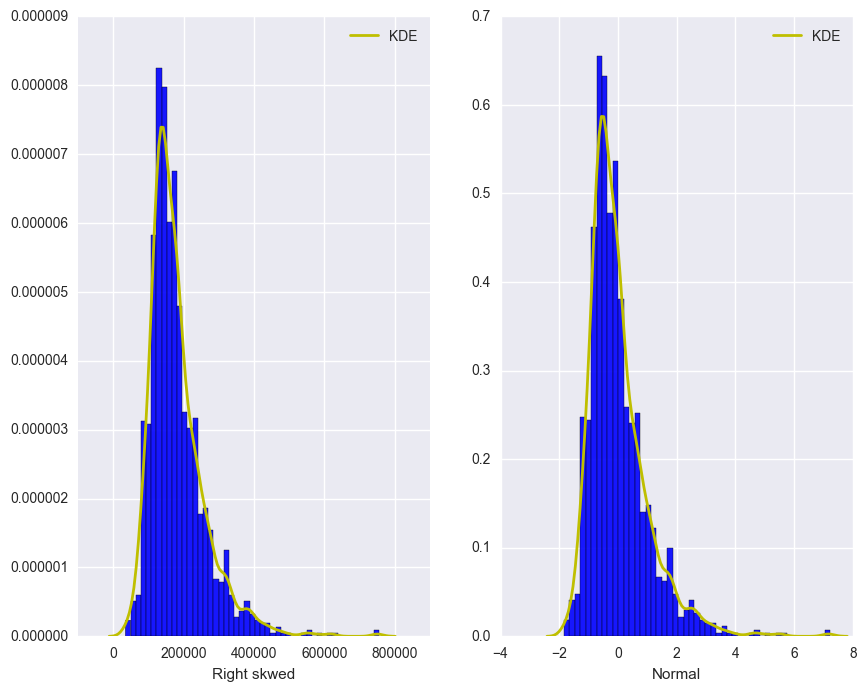

In [237]:
fig, ax = plt.subplots(1, 2, figsize = (10, 8))

sc_series_SalePrice = pd.Series(sp_scale, name="Normal")
sns.distplot(sc_series_SalePrice, color = 'b', hist_kws={'alpha': 0.9}
            , rug_kws={"color": "g"}
            , kde_kws={"color": "y", "lw": 2, "label": "KDE"}
            , ax =ax[1])

series_SalePrice = pd.Series(train['SalePrice'], name="Right skwed")
sns.distplot(series_SalePrice, color = 'b', hist_kws={'alpha': 0.9}
            , rug_kws={"color": "g"}
            , kde_kws={"color": "y", "lw": 2, "label": "KDE"}
            , ax =ax[0])


> Figure 1: House pricre distribution transformation

Many statistical tests and intervals are based on the assumption of normality. The assumption of normality often leads to tests that are simple, mathematically tractable, and powerful compared to tests that do not make the normality assumption.
Unfortunately, our dataset is in fact not approximately normal. However, an appropriate transformation of a data set can often yield a data set that does follow approximately a normal distribution. This increases the applicability and usefulness of statistical techniques based on the normality assumption.

### Exploratory Visualization

https://www.kaggle.com/xchmiao/house-prices-advanced-regression-techniques/detailed-data-exploration-in-python

#### Numerical features

Given that the independant variables are dichotomous or continuous and the dependant variable (house price) is continuous, therefore, we will conduct a correlation test to answer the below question. 

_How strongly and in what direction (i.e., +, -) are the independant variables and dependant variable related?_

In [238]:
num_vars = df.select_dtypes(include = ['float64', 'int64'])

In [239]:
num_vars.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold'],
      dtype='object')

The below graph display the correlation variables.

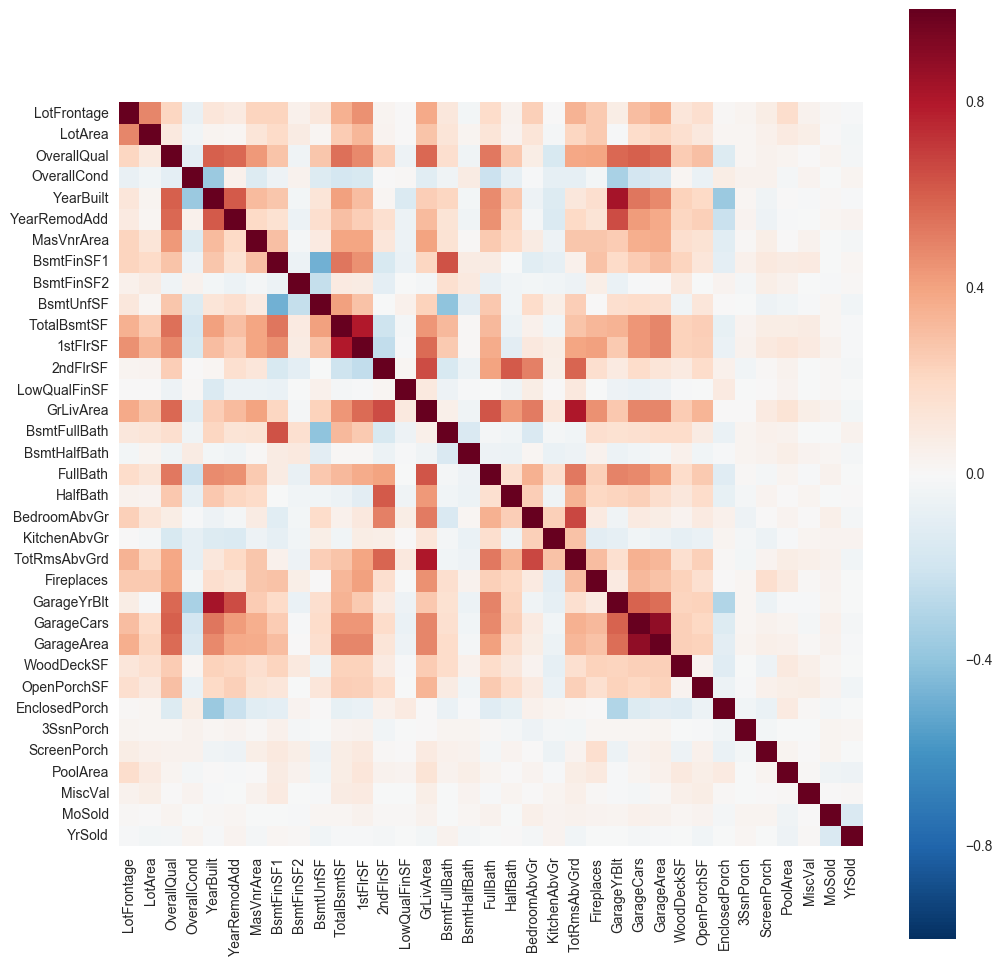

In [240]:
num_vars_corr = num_vars.iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(num_vars_corr, vmax=1, square=True)

In [241]:
num_vars_corr.sort().head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1stFlrSF,0.458247,0.332460,0.479152,-0.157418,0.310814,0.242245,0.395834,0.458092,0.084330,0.296600,...,0.492011,0.227347,0.238502,-0.065796,0.044086,0.098381,0.121900,0.093062,0.040143,-0.013442
2ndFlrSF,0.026545,0.031515,0.245596,0.005494,0.017588,0.158985,0.121014,-0.162301,-0.097744,-0.000376,...,0.128570,0.089922,0.185387,0.054645,-0.032458,0.011070,0.044503,-0.005299,0.014185,-0.019229
3SsnPorch,0.028289,0.015995,0.018715,0.043739,0.015958,0.037433,0.013612,0.050908,-0.023279,-0.005810,...,0.029440,-0.003935,-0.009392,-0.032822,1.000000,-0.029546,-0.006525,-0.000788,0.027391,0.022560
BedroomAbvGr,0.234892,0.132801,0.073075,-0.008477,-0.053101,-0.021912,0.078126,-0.113547,-0.031223,0.183259,...,0.073912,0.031644,0.086212,0.049940,-0.048279,0.007254,0.036544,0.000245,0.055997,-0.020453
BsmtFinSF1,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,...,0.310449,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556
BsmtFinSF2,0.047431,0.084059,-0.042771,0.041501,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,-0.238241,...,0.003139,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,0.008883
BsmtFullBath,0.113245,0.128349,0.164543,-0.042133,0.211580,0.134947,0.141593,0.638847,0.162835,-0.398678,...,0.184738,0.186107,0.081265,-0.068393,0.027378,0.053119,0.043970,-0.004629,-0.003568,0.045255
BsmtHalfBath,-0.025629,0.026292,-0.040732,0.084181,-0.030282,-0.046285,0.015006,0.078361,0.099485,-0.107121,...,-0.021445,0.051549,-0.034917,-0.009675,0.026861,0.042069,0.066851,0.036902,0.023014,-0.020028
BsmtUnfSF,0.113714,0.021362,0.275175,-0.138202,0.130473,0.165175,0.090163,-0.477404,-0.238241,1.000000,...,0.164409,-0.039302,0.119764,0.005006,-0.005810,-0.049158,-0.032273,-0.010492,0.022607,-0.038015
EnclosedPorch,0.011509,0.020974,-0.139256,0.071044,-0.374073,-0.220456,-0.111499,-0.099712,0.032740,0.005006,...,-0.106417,-0.119114,-0.059672,1.000000,-0.032822,-0.064377,0.092534,0.008654,-0.020976,-0.001134


#### List of all numerical features orderd by their correlation with Sale Price

After measuring the correlation between each feature and the sale price,the below table (Table 2) shows that the housing price correlates strongly with _OverallQual, GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea and Fireplaces._ However, some of those features are highly correlated among each others.

| Feature | Correlation with Sale Price |
| :-: | :-: |
|OverallQual | 	0.790981600584 |
|GrLivArea | 	0.708624477613 |
|GarageCars | 	0.640409197258 |
|GarageArea | 	0.623431438918 |
|TotalBsmtSF | 	0.613580551559 |
|1stFlrSF | 	0.605852184692 |
|FullBath | 	0.560663762748 |
|TotRmsAbvGrd | 	0.533723155582 |
|YearBuilt | 	0.522897332879 |
|YearRemodAdd | 	0.507100967111 |
|GarageYrBlt | 	0.486361677488 |
|MasVnrArea | 	0.477493047096 |
|Fireplaces | 	0.466928836752 |
|BsmtFinSF1 | 	0.386419806242 |
|LotFrontage | 	0.351799096571 |
|WoodDeckSF | 	0.324413444568 |
|2ndFlrSF | 	0.319333802832 |
|OpenPorchSF | 	0.315856227116 |
|HalfBath | 	0.284107675595 |
|LotArea | 	0.263843353871 |
|BsmtFullBath | 	0.227122233131 |
|BsmtUnfSF | 	0.214479105547 |
|BedroomAbvGr | 	0.168213154301 |
|KitchenAbvGr | 	-0.135907370842 |
|EnclosedPorch | 	-0.128577957926 |
|ScreenPorch | 	0.111446571143 |
|PoolArea | 	0.0924035494919 |
|OverallCond | 	-0.0778558940487 |
|MoSold | 	0.0464322452238 |
|3SsnPorch | 	0.0445836653357 |
|YrSold | 	-0.0289225851687 |
|LowQualFinSF | 	-0.0256061300007 |
|MiscVal | 	-0.0211895796403 |
|BsmtHalfBath | 	-0.0168441542974 |
|BsmtFinSF2 | 	-0.0113781214502 |

> Table 2: Numerical features correlation with Sale Price

The below figure show the top correlated features and sale price.

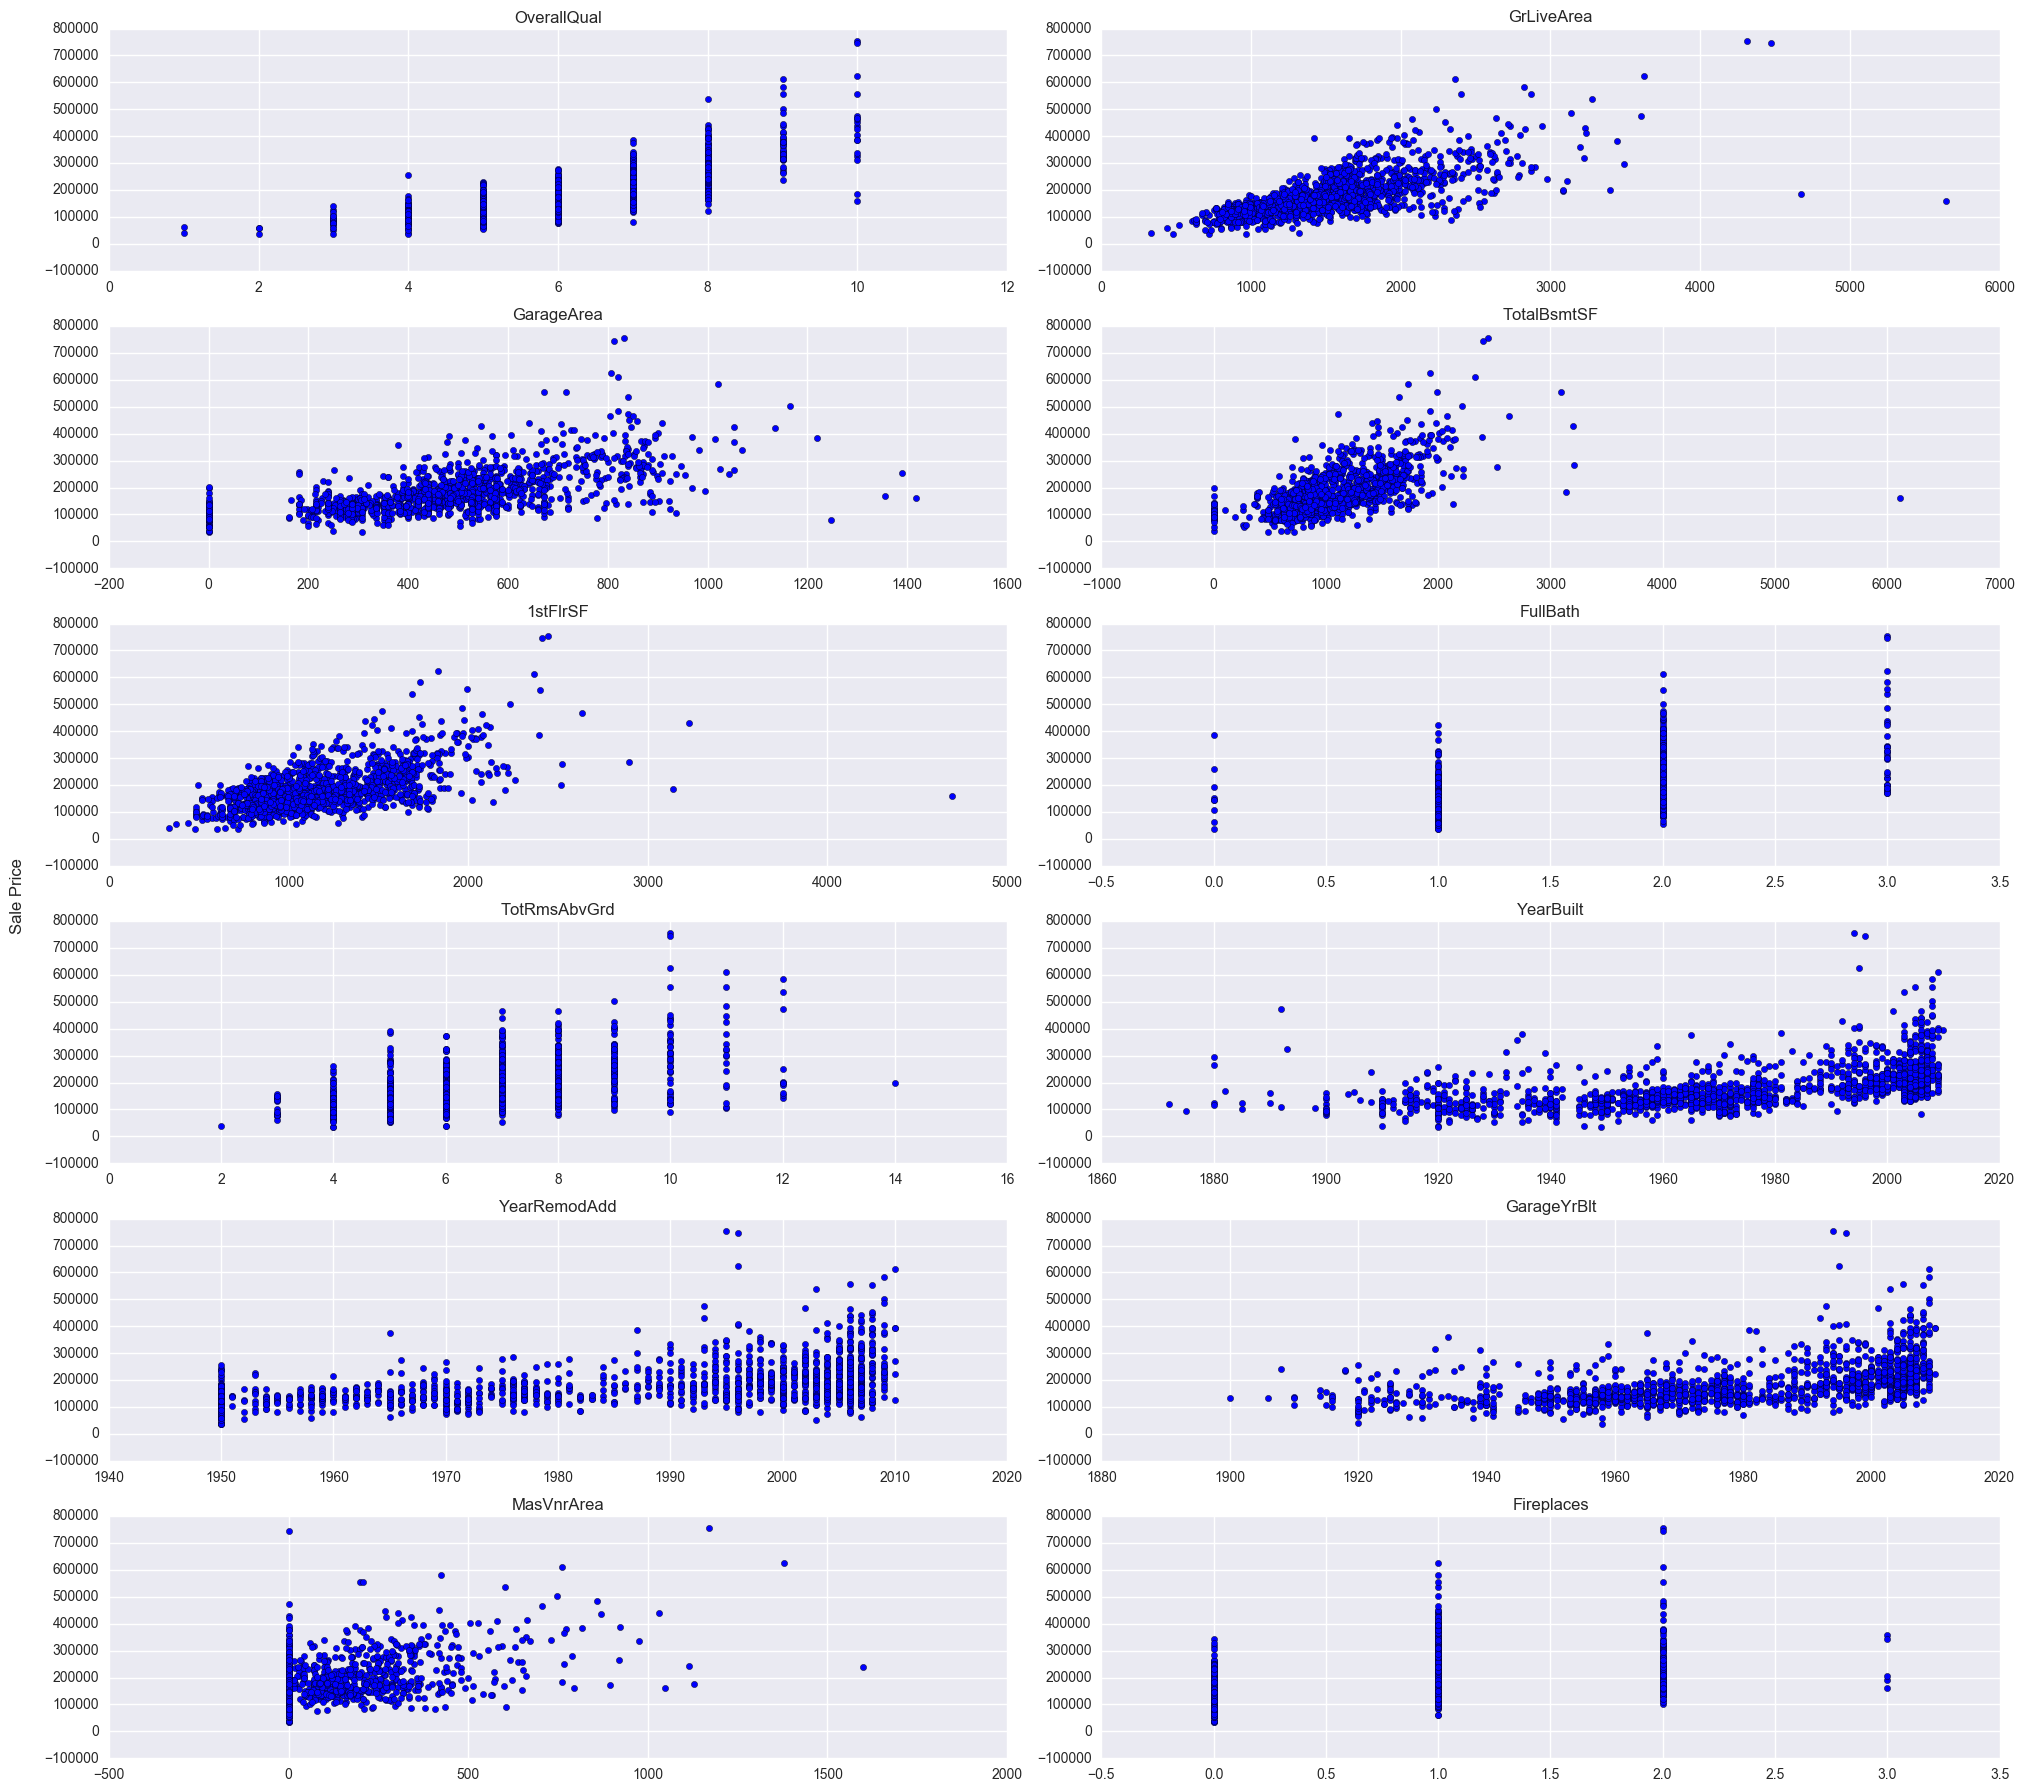

In [242]:
plt.figure(1)
f, axarr = plt.subplots(6, 2, figsize=(20, 18))
price = train.SalePrice.values

axarr[0, 0].scatter(train.OverallQual.values, price)
axarr[0, 0].set_title('OverallQual')
axarr[0, 1].scatter(train.GrLivArea.values, price)
axarr[0, 1].set_title('GrLiveArea')

axarr[1, 0].scatter(train.GarageArea.values, price)
axarr[1, 0].set_title('GarageArea')
axarr[1, 1].scatter(train.TotalBsmtSF.values, price)
axarr[1, 1].set_title('TotalBsmtSF')

axarr[2, 0].scatter(train['1stFlrSF'].values, price)
axarr[2, 0].set_title('1stFlrSF')
axarr[2, 1].scatter(train.FullBath.values, price)
axarr[2, 1].set_title('FullBath')

axarr[3, 0].scatter(train.TotRmsAbvGrd.values, price)
axarr[3, 0].set_title('TotRmsAbvGrd')
axarr[3, 1].scatter(train.YearBuilt.values, price)
axarr[3, 1].set_title('YearBuilt')

axarr[4, 0].scatter(train.YearRemodAdd.values, price)
axarr[4, 0].set_title('YearRemodAdd')
axarr[4, 1].scatter(train.GarageYrBlt.values, price)
axarr[4, 1].set_title('GarageYrBlt')

axarr[5, 0].scatter(train.MasVnrArea.values, price)
axarr[5, 0].set_title('MasVnrArea')
axarr[5, 1].scatter(train.Fireplaces.values, price)
axarr[5, 1].set_title('Fireplaces')

f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

> Figure 2: Strongly correlated numerical features correlation with Sale Price

### Categorical Features

Given that the independant variables categorical and the dependant variable (house price) is continuous, therefore, we will try to answer the below question. 

_Do differences exist between 2 or more groups on one dependant variable?_

In [244]:
print(train.select_dtypes(include=['object']).columns.values)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


#### Neighborhood

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

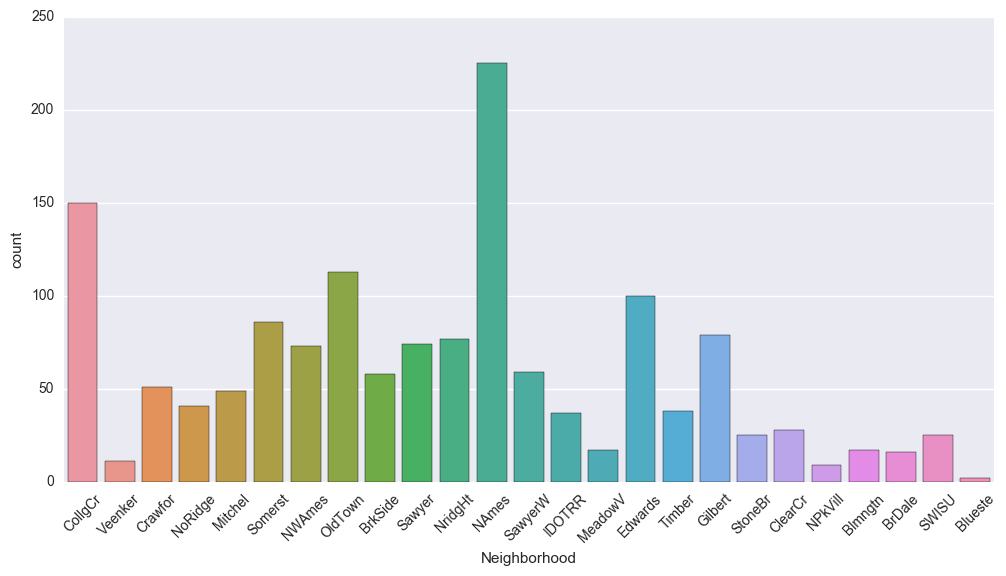

In [245]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
plt.xticks(rotation=45)

> Figure 4: Neighborhood 

Could group those Neighborhoods with similar housing price into a same bucket for dimension-reduction.

#### House Sale
##### SaleType
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other


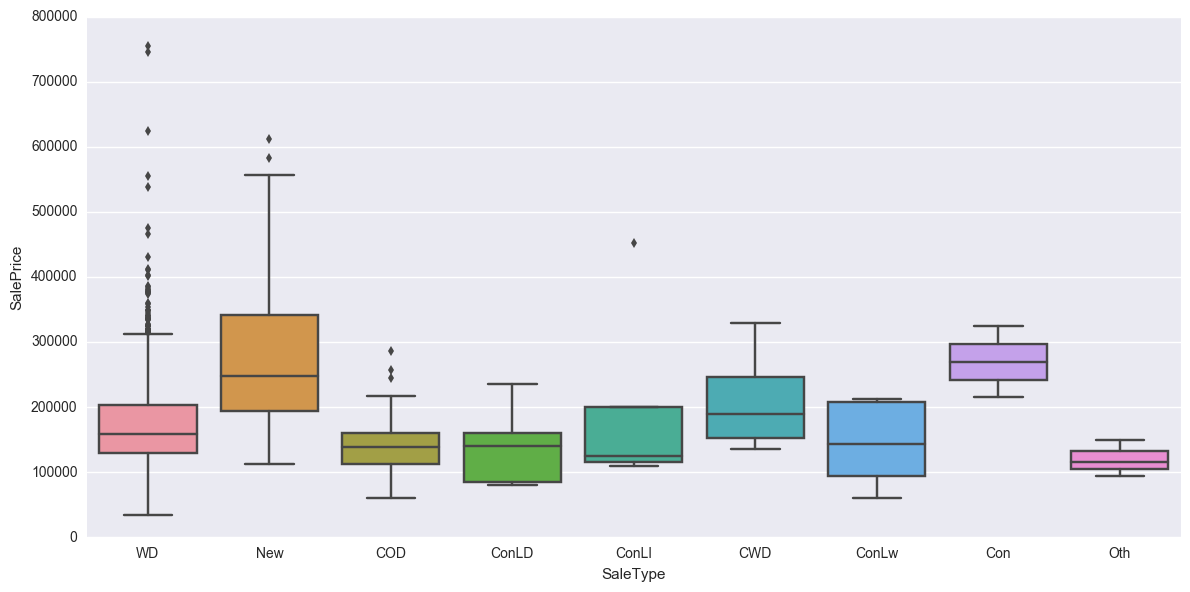

In [246]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train)
plt.tight_layout()

#### SaleCondition

##### Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


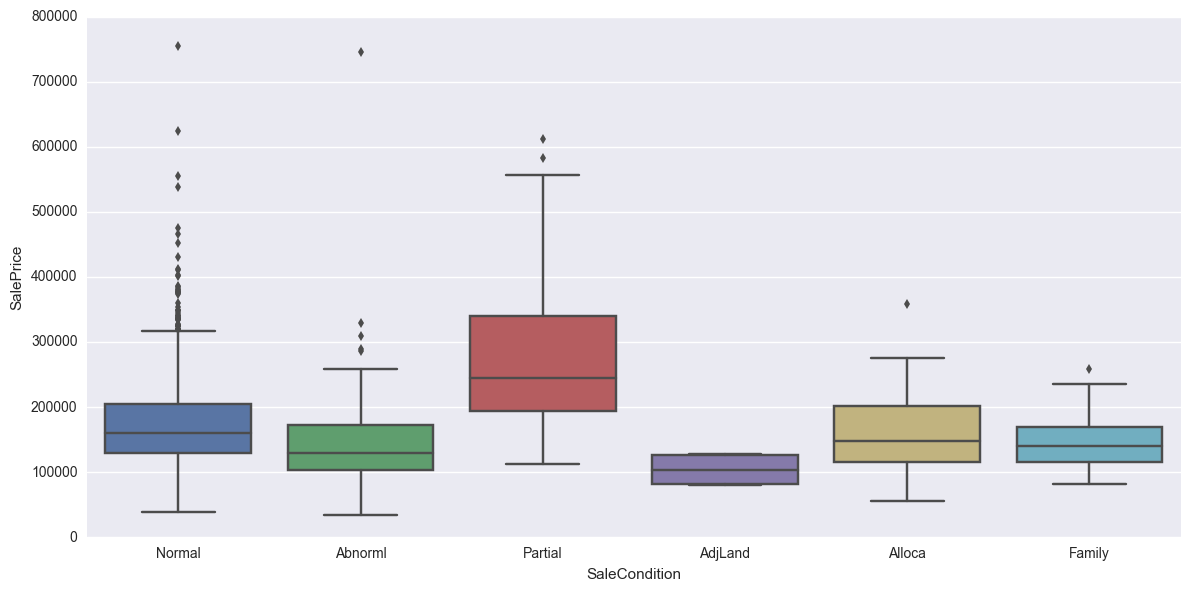

In [247]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train)
plt.tight_layout()

##### Year and Month of the Sale

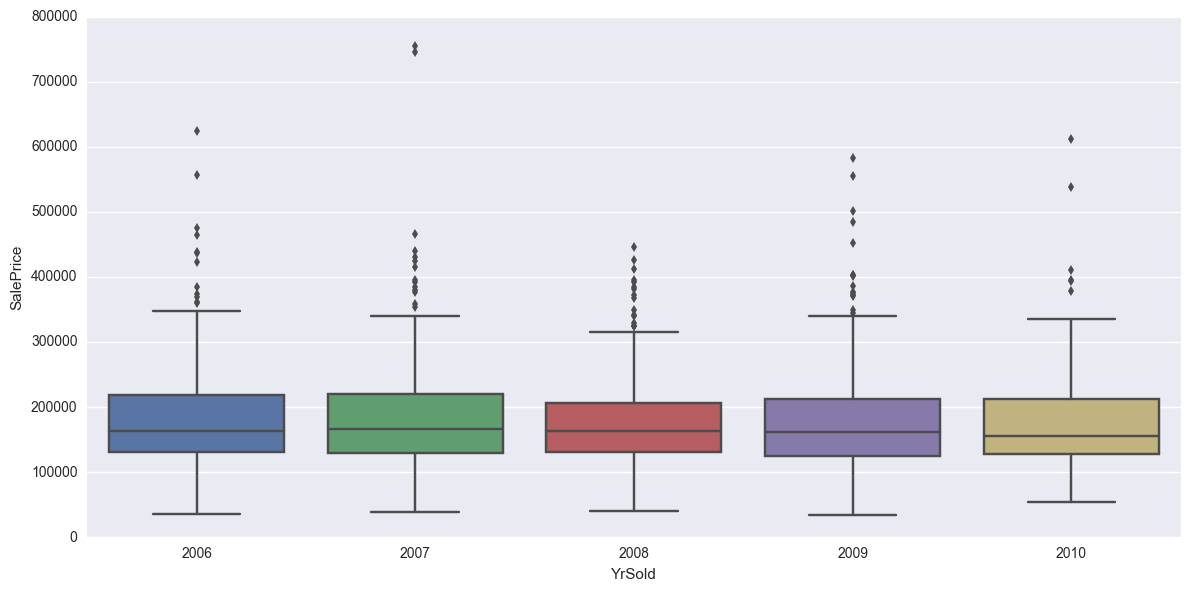

In [248]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = train)
plt.tight_layout()

> Figure: Year of the sale with house price

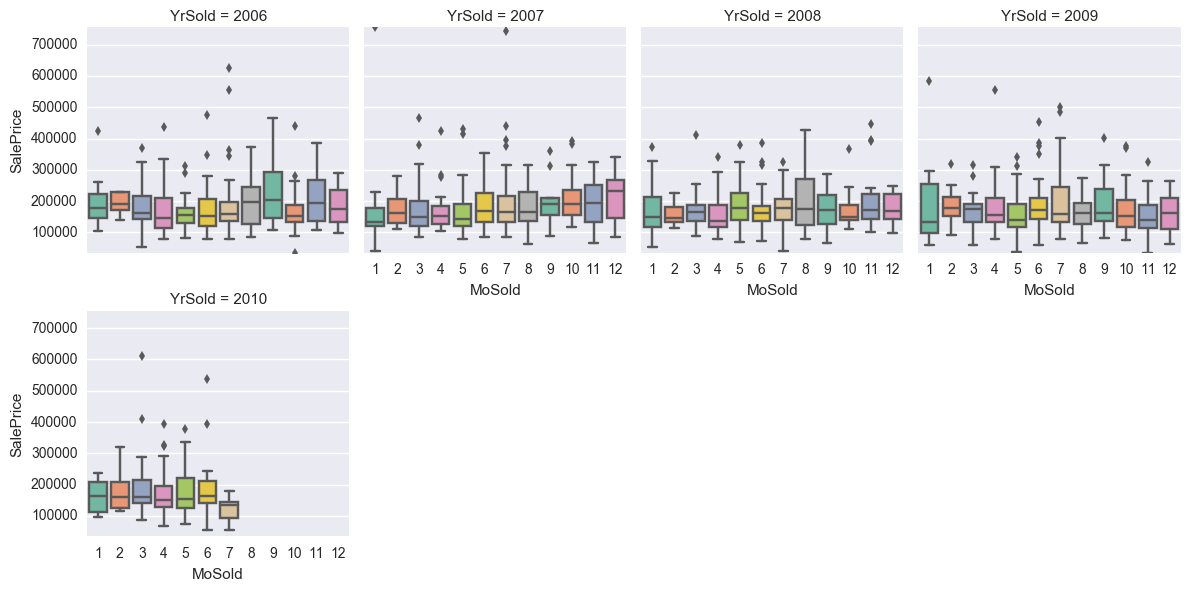

In [249]:
g = sns.FacetGrid(train, col = 'YrSold', col_wrap = 4)
g.map(sns.boxplot, 'MoSold', 'SalePrice', palette='Set2', order = range(1, 13)).set(ylim = (min(train['SalePrice']), max(train['SalePrice'])))
plt.tight_layout()

> Figure: Year and month of the sale with house price

We could conclude thate the year and the month of the sale does not impact the price.

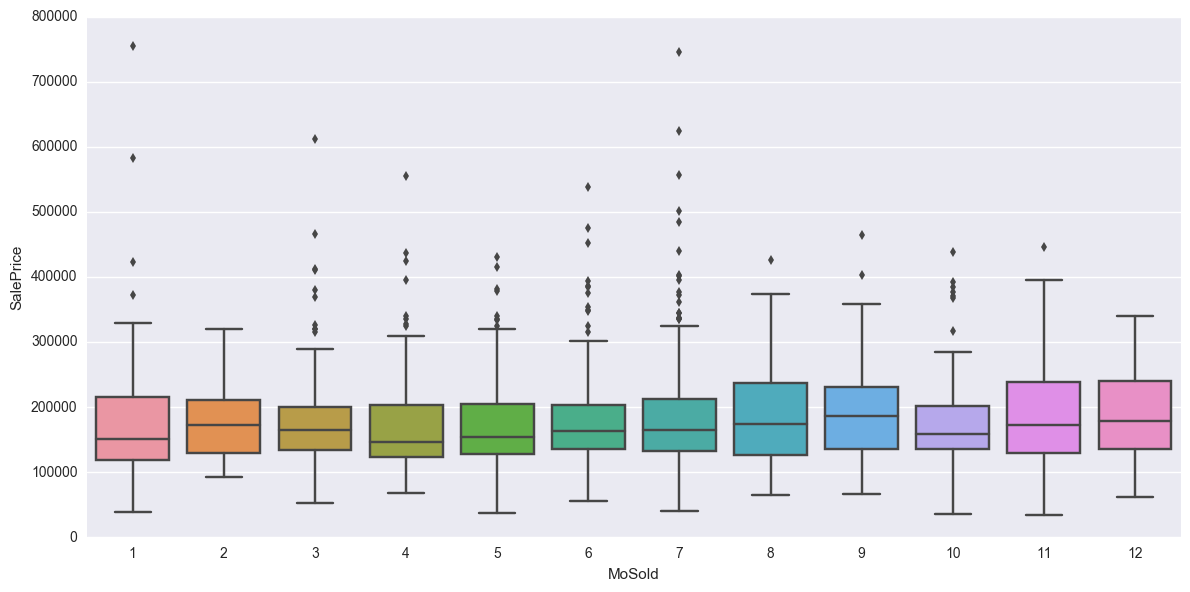

In [250]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = train)
plt.tight_layout()

#### Housing Style

##### Type of dwelling 

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

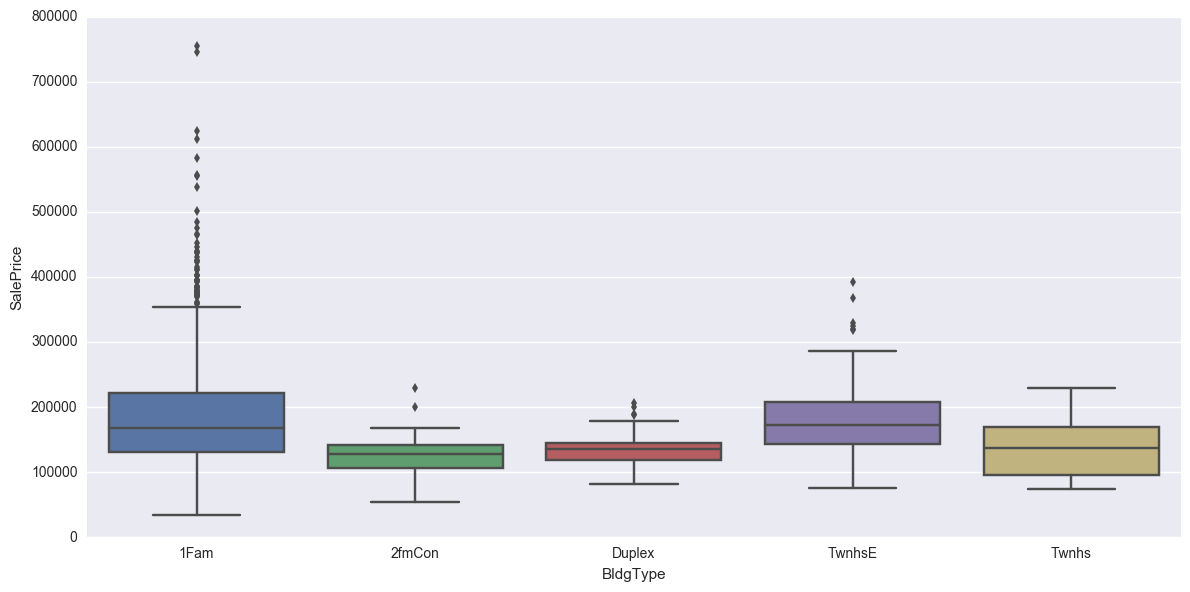

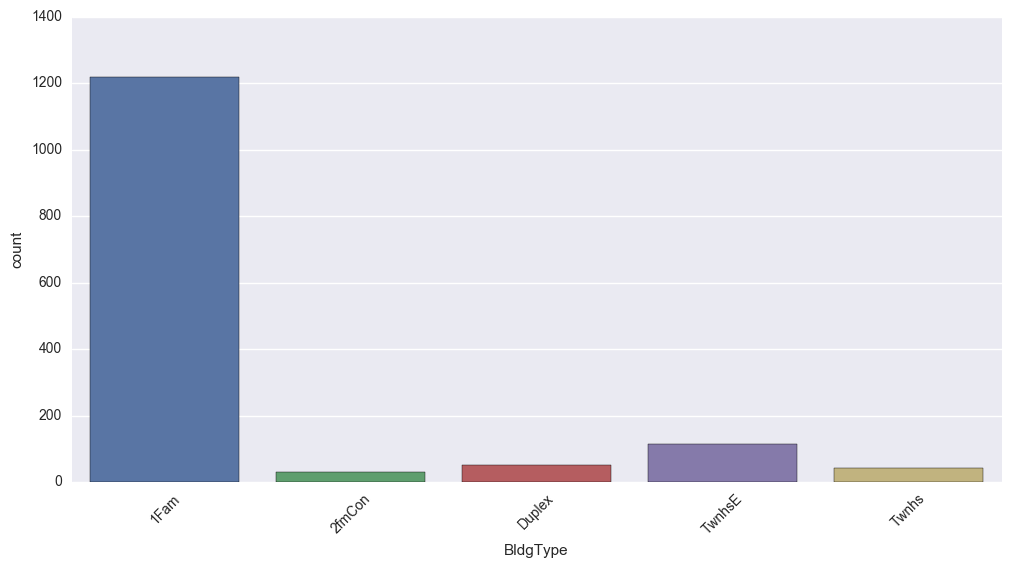

In [251]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = train)
plt.tight_layout()

plt.figure(figsize = (12, 6))
sns.countplot(x = 'BldgType', data = train)
plt.xticks(rotation=45)

> Figure: Type of dwelling 

Single-family Detached (1Fam) dweling type is the most sold type

##### Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

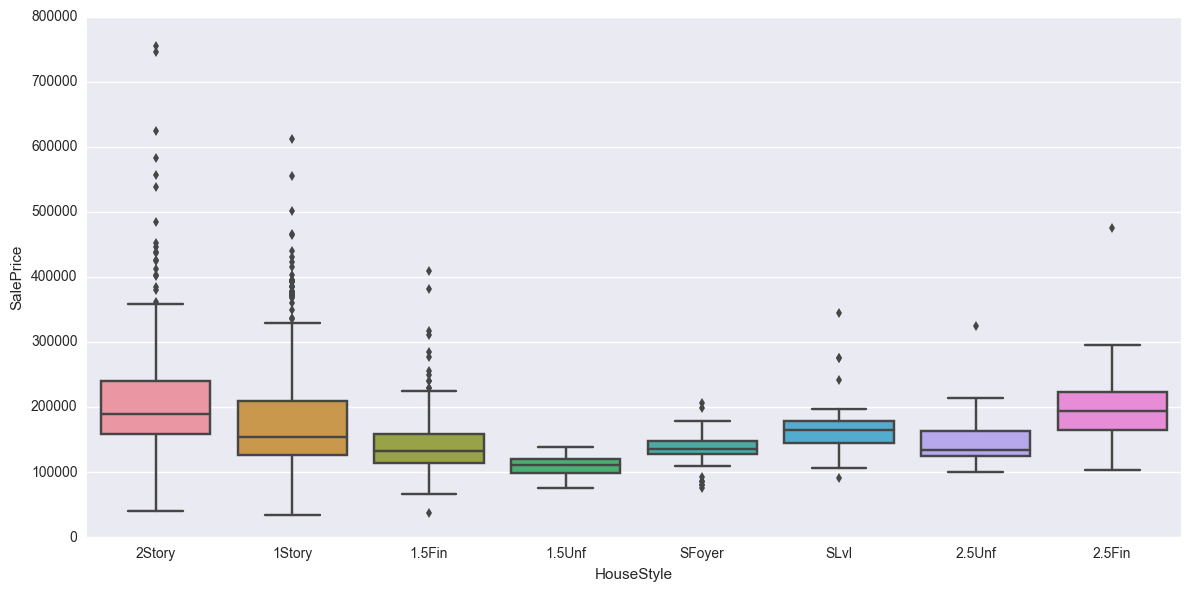

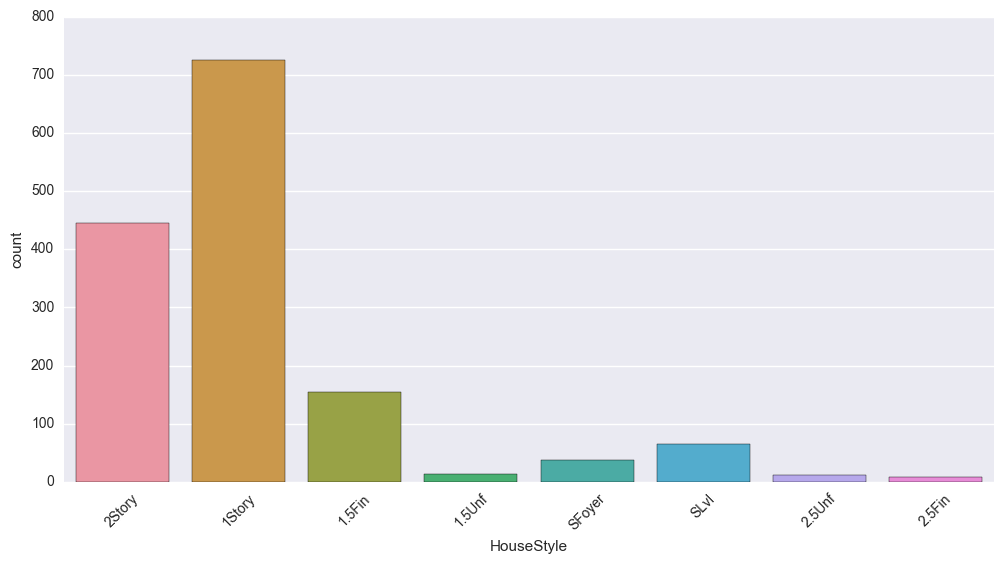

In [252]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = train)
plt.tight_layout()

plt.figure(figsize = (12, 6))
sns.countplot(x = 'HouseStyle', data = train)
plt.xticks(rotation=45)

> Figure House style

One story and 1.5Fin	One and one-half story: 2nd level finished are the most type sold

#### Housing Condition

##### Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

##### Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

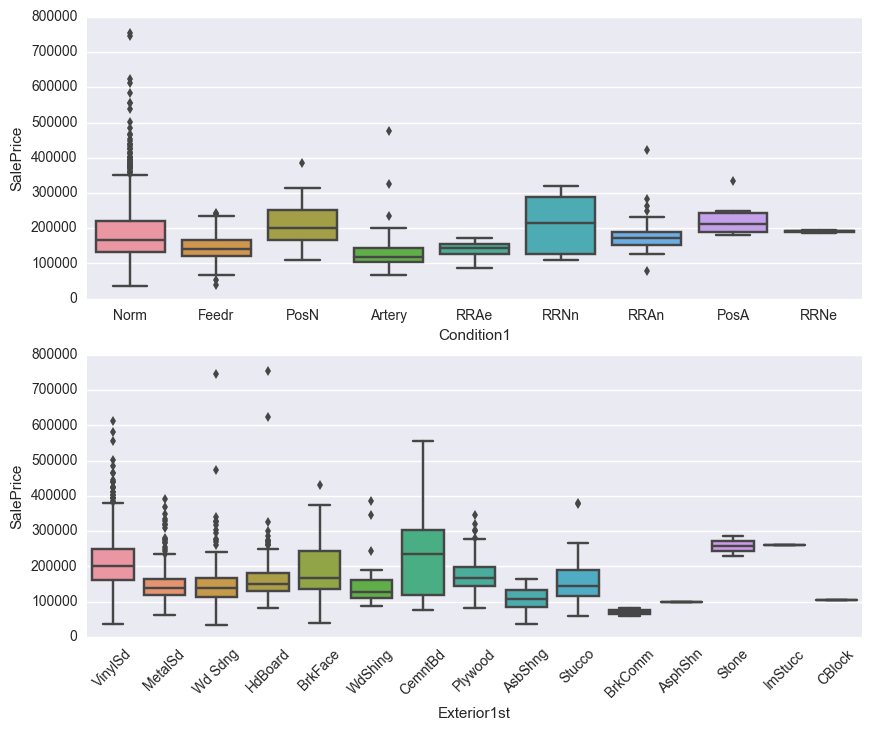

In [253]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = train, ax = ax[1])
x = plt.xticks(rotation = 45)
plt.show()

##### Basement Conditions

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

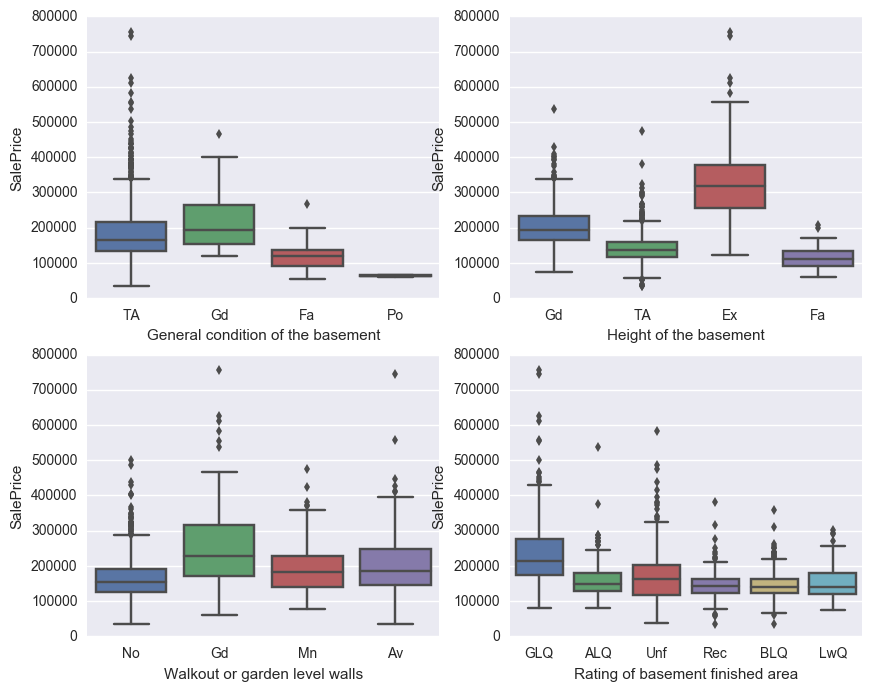

In [254]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))
ax00 = sns.boxplot('BsmtCond', 'SalePrice', data = train, ax = ax[0, 0])
ax00.set(xlabel='General condition of the basement')

ax01 = sns.boxplot('BsmtQual', 'SalePrice', data = train, ax = ax[0, 1])
ax01.set(xlabel='Height of the basement')

ax10 = sns.boxplot('BsmtExposure', 'SalePrice', data = train, ax = ax[1, 0])
ax10.set(xlabel='Walkout or garden level walls')

ax11 = sns.boxplot('BsmtFinType1', 'SalePrice', data = train, ax = ax[1, 1])
ax11.set(xlabel='Rating of basement finished area')

> Figure: Basement

Having no basement decrease the house price

##### Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

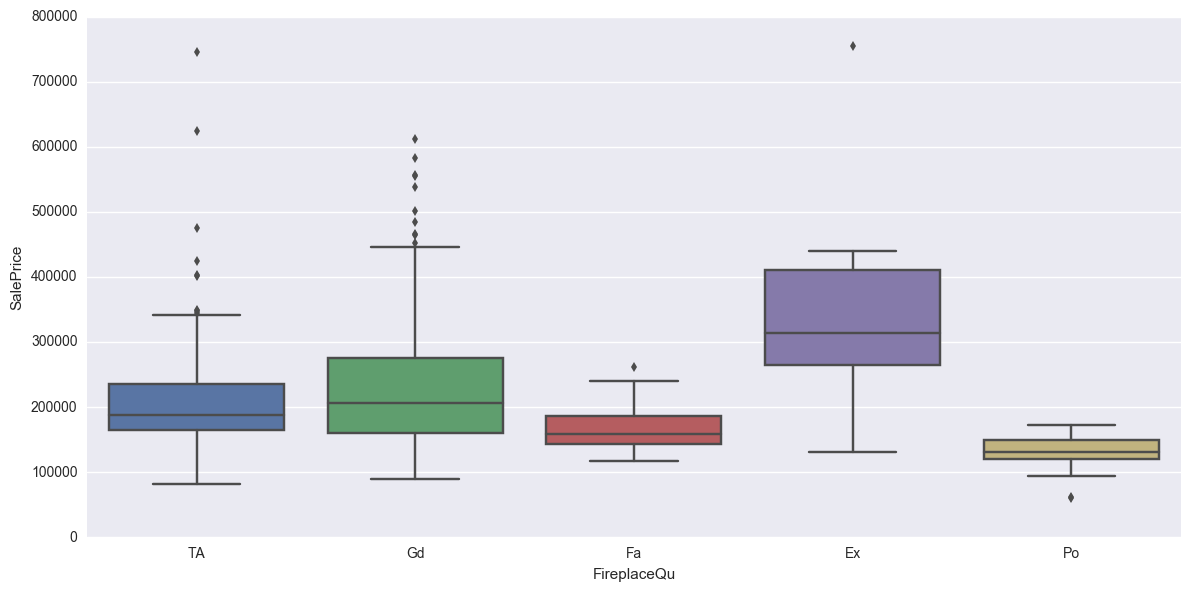

In [255]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = train)
plt.tight_layout()

##### Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

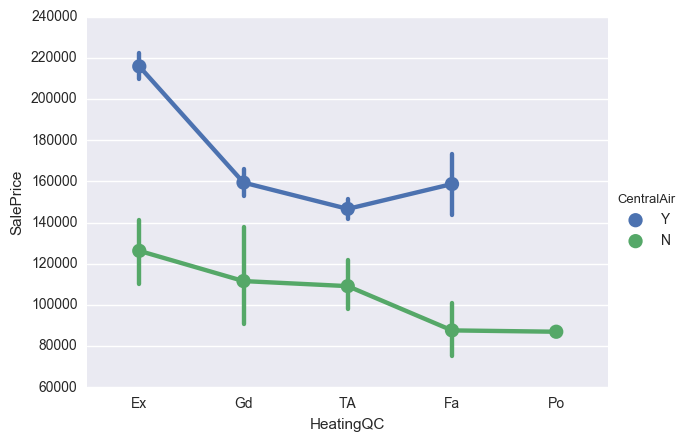

In [256]:
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', estimator = np.mean, data = train, size = 4.5, aspect = 1.4)

> Figure: fire place, heating

Having a firplace/heating is a feature that increase the house price, and having none decrease house sale price.

##### Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

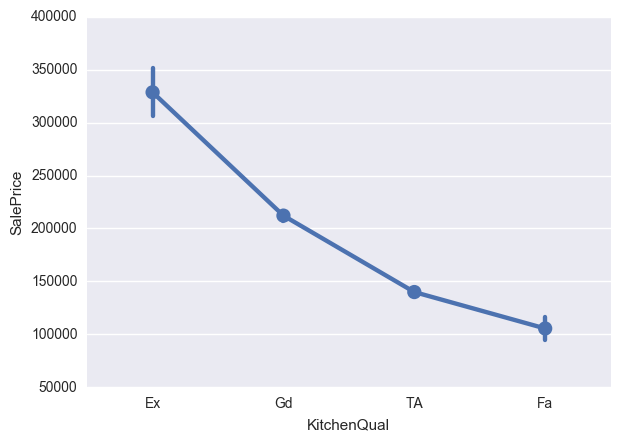

In [257]:
sns.factorplot('KitchenQual', 'SalePrice', estimator = np.mean, size = 4.5, aspect = 1.4, data = train, order = ['Ex', 'Gd', 'TA', 'Fa'])

> Figure: kitchen

The condition of the kitchen is a feature that increase the house price.

##### Area classification

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

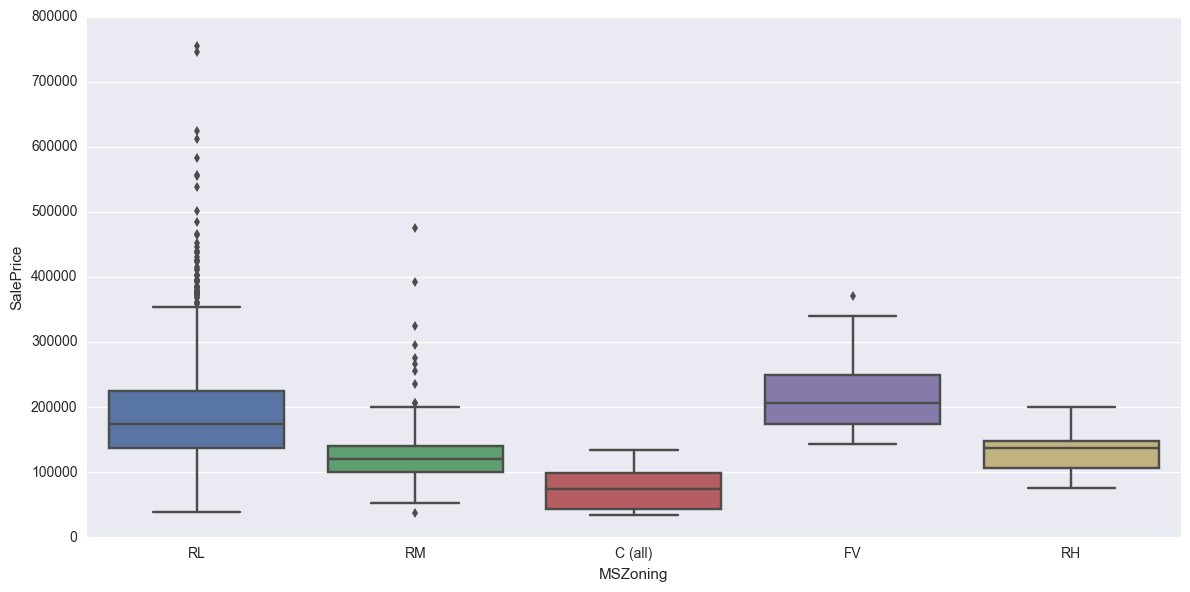

In [258]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train)
plt.tight_layout()

#### Street & Alley Access

##### Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
##### Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

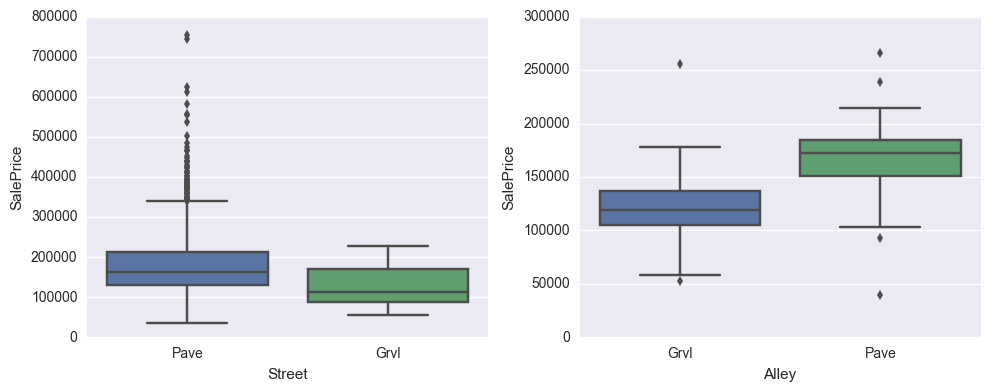

In [259]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.boxplot(x = 'Street', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'Alley', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

In [260]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Algorithms and Techniques

Before we train our model first we need to preprocess our data, starting from dealing with null or missing data, scale our numerical feature to be between 0 and 1 so that comparision performed on the same ground as well as transform the numerical data to be normaly distribute, encod the categorical features and finally split out data to training, validation and testing sets.
* Feature Scaling: $ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $
* Feature Normalization: $ z = \frac{x - μ}{σ} $
* One-Hot Encoding

As we saw in the data exploration part above this dataset has many features some are relevant to the sale price feature (our target value) and many are not, therefore, to build a model that is able to predict the sale price of new houses we need to reduce our dimention space to avoid curse of dimentionality, overfitting and to get better results, starting from feature selection methods like SelectPercentile, SelectKBest followed with Feature transformation methods like PCA we should be able to select the most relevant features for our model.

Now we are ready to train our model we will be using multiple algorithms and compare them also as we need to select the best hyperparameter for each method we will use GridSearchCV or RandomizedSearchCV to tune our model parameters, below are the list of algorithms that we will be using:
* Logistic regression
* SVM
* Random forest

Finally we will evaluate our models, select the best model and report the final result on the testing data.

## Benchmark

"Traditionally house price prediction does not take into consideration the wide range of available parameters." Therefore our benchmark model could be a linear regression model that predict the price based on some of the traditional parameters like square_feed, num_of_rooms, neighbour.

** Create our benchmark dataset **

Generate a dataset to include these variables BedroomAbvGr, Neighborhood, LotArea and the target variable SalePrice

In [219]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model, cv=5):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = cv))
    return(rmse)

def rmse_cv_test(model, cv=5):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = cv))
    return(rmse)

In [220]:
bench_df = pd.read_csv('train.csv')
bench_df = bench_df[['BedroomAbvGr','Neighborhood','LotArea','SalePrice']]
bench_df.head()

,BedroomAbvGr,Neighborhood,LotArea,SalePrice
0,3,CollgCr,8450,208500
1,3,Veenker,9600,181500
2,3,CollgCr,11250,223500
3,3,Crawfor,9550,140000
4,4,NoRidge,14260,250000


** Preprocess our benchmark dataset **

Normalize and encode our benchmark dataset

In [221]:
from scipy.stats import skew

bench_skewness = bench_df[['BedroomAbvGr', 'LotArea', 'SalePrice']].apply(lambda x: skew(x))
bench_skewness = bench_skewness[abs(bench_skewness) > 0.5]
print(str(bench_skewness.shape[0]) + " skewed numerical features to log transform")
bench_skewed_features = bench_skewness.index

bench_df[bench_skewed_features] = np.log1p(bench_df[bench_skewed_features])

2 skewed numerical features to log transform


In [222]:
bench_df = pd.get_dummies(bench_df)

bench_df.head()

,BedroomAbvGr,LotArea,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,3,9.042040,12.247699,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,9.169623,12.109016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,9.328212,12.317171,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,9.164401,11.849405,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,9.565284,12.429220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


** Split out benchmark dataset **

In [223]:
y_bench = bench_df['SalePrice']
X_bench = bench_df
del X_bench['SalePrice']

In [227]:
X_train_bench, X_test_bench, y_train_bench, y_test_bench = 
train_test_split(X_bench, y_bench, test_size=0.3, random_state=0)

** Train benchmark model - Linear regression model**

In [229]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import cross_val_predict

bench_model = linear_model.LinearRegression()

rmse_train = np.sqrt(-cross_val_score(bench_model, X_train_bench, y_train_bench, scoring = scorer))

rmse_test = np.sqrt(-cross_val_score(bench_model, X_test_bench, y_test_bench, scoring = scorer))

print "Benchmark RMSE on Training set :", rmse_train.mean()
print "Benchmark RMSE on testing set :", rmse_test.mean()

Benchmark RMSE on Training set : 0.245443865925
Benchmark RMSE on testing set : 0.247736170388


** Benchmark model results **

RMSE for the Benchmark model is: 0.24 

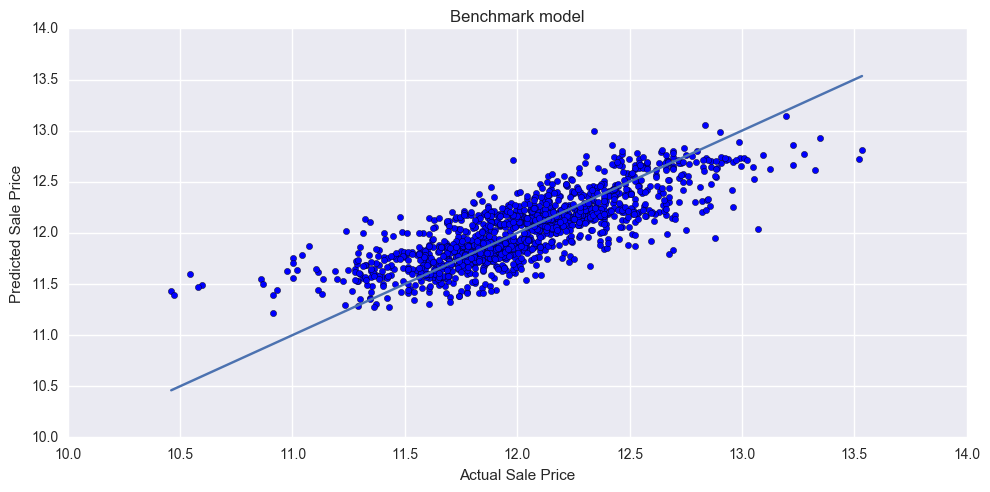

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(y_bench, y_pred, s=20)
plt.title('Benchmark model')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_bench), max(y_bench)], [min(y_bench), max(y_bench)])
plt.tight_layout()

> Figure: benchmark regression graph

## III. Methodology

### Data Preprocessing

In [342]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Spot outliers

Outliers in data could mislead the training process which could result in longer training times, less accurate and poorer results. 

Machine learning algorithms like Linear regression or PCA which we will be using are prone to outliers, therefore, we will spot the outliers in the dataset and remove them.

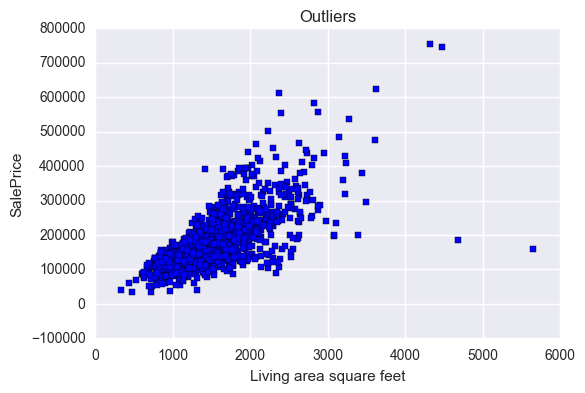

In [343]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Outliers")
plt.xlabel("Living area square feet")
plt.ylabel("SalePrice")
plt.show()

> Figure: Outliers

There are some extreme outliers on the dataset, large houses sold for low price and very expensive houses. 
The author of the dataset recommends removing _any houses with more than 4000 square feet_.

https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

In [344]:
train = train[train.GrLivArea < 4000]

y_db_train = train['SalePrice']

df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

#### Handel Null data

Null or missing data points should not be removed or deleted blindly, as it could represent an inetersting pattern on the data or it could be a value on it's own, therefore, next we will report the features and the number of null values in each one and assist them one by one to determine the best approach that we should follow. 

In [345]:
fet_has_null = []
for fet in df.columns:
    if df[fet].isnull().values.any():
        f_len = len(df[fet][df[fet].isnull() == True])
        fet_has_null.append((fet, f_len))
print fet_has_null

[('MSZoning', 4), ('LotFrontage', 486), ('Alley', 2717), ('Utilities', 2), ('Exterior1st', 1), ('Exterior2nd', 1), ('MasVnrType', 24), ('MasVnrArea', 23), ('BsmtQual', 81), ('BsmtCond', 82), ('BsmtExposure', 82), ('BsmtFinType1', 79), ('BsmtFinSF1', 1), ('BsmtFinType2', 80), ('BsmtFinSF2', 1), ('BsmtUnfSF', 1), ('TotalBsmtSF', 1), ('Electrical', 1), ('BsmtFullBath', 2), ('BsmtHalfBath', 2), ('KitchenQual', 1), ('Functional', 2), ('FireplaceQu', 1420), ('GarageType', 157), ('GarageYrBlt', 159), ('GarageFinish', 159), ('GarageCars', 1), ('GarageArea', 1), ('GarageQual', 159), ('GarageCond', 159), ('PoolQC', 2907), ('Fence', 2345), ('MiscFeature', 2810), ('SaleType', 1)]


**_LotFrontage_** feature hase 259 Null value, LotFrontage represent linear feet of street connected to property and it's a numerical feature. Null value does not mean that the property is not connected to a street, therefore, replacing the Null values for this feature with the mean will give us reasonable approximation.

**_Alley_** A categprical feature that represent type of alley access to property, it has 1369 Null values, the Null in this feature represent No alley access, therefore, this is not considerd as a Null value and we could leave it and consider the NA as a 3rd category along with Gravel and Paved or we could replace it with no_alley_access explicitly.

**_MasVnrType_** A categprical feature that represent masonry veneer type, the null here means the absense of this value and **_MasVnrArea_** is a numerical feature that represent Masonry veneer area in square feet if it has a type, both features are related and have only 8 Null values, therefore, setting the type to No and the Area to be zero.

**_ BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2_** are categorical features describe the basement and the Na is a category value that represent No Basement therefore, we could replace both features Na values with no_basement

**_Electrical_** A categorical feature that represent Electrical system and has only 1 null value, therefore, we will drop this row.

**_ FireplaceQu _** A categorical feature describe Fireplace quality and the Na is a category value that represent No Fireplace, therefore, we could replace both features Na values with no_fireplace

**_ GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond _** are categorical features describe the garage and the Na is a category value that represent No Garage therefore, we could replace both features Na values with no_garage, however, we will leave **_GarageYrBlt_** feature to be Null as it's a numerical feature that has no value when there is no garage, however, we will set this value to be same as YearBuilt of the house.

**_ PoolQC _** A categorical feature describe Pool quality and the Na is a category value that represent No Pool, therefore, we could replace both features Na values with no_pool

**_ Fence _** A categorical feature describe Fence quality and the Na is a category value that represent No Fence, therefore, we could replace both features Na values with no_fence

**_ MiscFeature _** A categorical feature describe Miscellaneous feature not covered in other categories and the Na is a category value that represent None, therefore, we could replace both features Na values with None


In [346]:
final_df = df[:]

In [347]:
final_df['LotFrontage'].fillna(final_df['LotFrontage'].mean(), inplace=True)
final_df['GarageCars'].fillna(final_df['GarageCars'].mean(), inplace=True)
final_df['GarageArea'].fillna(final_df['GarageArea'].mean(), inplace=True)
final_df['BsmtFinSF1'].fillna(final_df['BsmtFinSF1'].mean(), inplace=True)
final_df['BsmtFinSF2'].fillna(final_df['BsmtFinSF2'].mean(), inplace=True)
final_df['BsmtUnfSF'].fillna(final_df['BsmtUnfSF'].mean(), inplace=True)
final_df['TotalBsmtSF'].fillna(final_df['TotalBsmtSF'].mean(), inplace=True)
final_df['MasVnrArea'].fillna(0, inplace=True)
final_df['TotalBsmtSF'].fillna(final_df['TotalBsmtSF'].mean(), inplace=True)
final_df['BsmtFullBath'].fillna(0, inplace=True)
final_df['BsmtHalfBath'].fillna(0, inplace=True)
final_df['Utilities'].fillna('ELO', inplace=True)
final_df['MSZoning'].fillna('A', inplace=True)
final_df['Alley'].fillna('No', inplace=True)
final_df['Exterior1st'].fillna('Other', inplace=True)
final_df['Exterior2nd'].fillna('Other', inplace=True)
final_df['KitchenQual'].fillna('Po', inplace=True)
final_df['Functional'].fillna('Typ', inplace=True)
final_df['SaleType'].fillna('Oth', inplace=True)
final_df['MasVnrType'].fillna('No', inplace=True)
final_df['Electrical'].fillna('Mix', inplace=True)
final_df['BsmtQual'].fillna('No', inplace=True)
final_df['BsmtCond'].fillna('No', inplace=True)
final_df['BsmtExposure'].fillna('No', inplace=True)
final_df['BsmtFinType1'].fillna('No', inplace=True)
final_df['BsmtFinType2'].fillna('No', inplace=True)
final_df['FireplaceQu'].fillna('No', inplace=True)
final_df['GarageType'].fillna('No', inplace=True)
final_df['GarageFinish'].fillna('No', inplace=True)
final_df['GarageQual'].fillna('No', inplace=True)
final_df['GarageCond'].fillna('No', inplace=True)
final_df['PoolQC'].fillna('No', inplace=True)
final_df['Fence'].fillna('No', inplace=True)
final_df['MiscFeature'].fillna('No', inplace=True)
final_df['CentralAir'].fillna('N', inplace=True)
final_df['GarageYrBlt'].fillna(final_df['YearBuilt'], inplace=True)

** Some numerical features are actually really categories ** 
* MSSubClass: Identifies the type of dwelling involved in the sale.
* MoSold: Month Sold (MM)
Therefore, we will replace there numerical values with categorical ones, for example, the Month Sold value 1 will be Jan ... etc.

In [348]:
final_df = final_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                 50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                 80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       
                 "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                             7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                })

Now that we handled all Null/Missing values we will start to analyize our dataset.

### Encoding categorical feature

Many manchine learning algorithms do not deal with string data, therefore, we need to transform our numerical data.
*  Manually encode categorical features as ordered numbers when there is information in the order, for example:
       Ex	Excellent  10
       Gd	Good  8
       TA	Average/Typical  5
       Fa	Fair  3
       Po	Poor  1
* One-Hot-Encoding for the rest of categorical features

In [349]:
final_df = final_df.replace({
    "Street": {"Grvl" : 1, "Pave" : 2}
    , "Alley" : {"No": 0, "Grvl" : 1, "Pave" : 2}
    , "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4}
    , "LandContour" : {"Low" : 1, "HLS" : 2, "Bnk" : 3, "Lvl" : 4}
    , "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}
    , "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3}
    , "BldgType" : {"TwnhsI" : 1, "Twnhs": 2, "TwnhsE" : 2, "Duplex" : 3, "2fmCon" : 4, "1Fam" : 5}
    , "MasVnrType" : {"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "No" : 0, "None": 0}
    , "BsmtQual" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA": 5, "Gd" : 7, "Ex" : 9}
    , "ExterCond" : {"Po" : 2, "Fa" : 3, "TA": 5, "Gd": 7, "Ex" : 9}
    , "GarageCond": {"No" : 0, "Po" : 2, "Fa" : 3, "TA": 5, "Gd" : 7, "Ex" : 9}
    , "PoolQC": {"No" : 0, "Po" : 2, "Fa" : 3, "TA": 5, "Gd" : 7, "Ex" : 9}
    , "ExterQual" : {"Po" : 2, "Fa" : 3, "TA": 5, "Gd": 7, "Ex" : 9}
    , "FireplaceQu" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA" : 5, "Gd" : 7, "Ex" : 9}
    , "KitchenQual" : {"Po" : 2, "Fa" : 3, "TA": 5, "Gd": 7, "Ex" : 9}
    , "GarageQual" : {"No" : 0, "Po" : 2, "Fa" : 3, "TA" : 5, "Gd" : 7, "Ex" : 9}
    , "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 5, "Gd" : 7, "Ex" : 9}
    , "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3}
    , "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
    , "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
    , "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 5, "Gd" : 7, "Ex" : 9}
    , "CentralAir" : {"N": 1, "Y": 5}
    , "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, "Typ" : 8}
    , "GarageFinish": {"No" : 0, "Unf" : 2, "RFn" : 3, "Fin" : 4}
    , "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2}
    , "Fence": {"No" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4}
})

In [350]:
final_df["SimplOverallQual"] = final_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
final_df["SimplOverallCond"] = final_df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
final_df["SimplPoolQC"] = final_df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
final_df["SimplGarageCond"] = final_df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
final_df["SimplGarageQual"] = final_df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
final_df["SimplFireplaceQu"] = final_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
final_df["SimplFireplaceQu"] = final_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
final_df["SimplFunctional"] = final_df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
final_df["SimplKitchenQual"] = final_df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
final_df["SimplHeatingQC"] = final_df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
final_df["SimplBsmtFinType1"] = final_df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
final_df["SimplBsmtFinType2"] = final_df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
final_df["SimplBsmtCond"] = final_df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
final_df["SimplBsmtQual"] = final_df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
final_df["SimplExterCond"] = final_df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
final_df["SimplExterQual"] = final_df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

### Feature Engineering

Transforming raw data into features that better represent the underlying problem to the predictive models should resul in improved model accuracy on unseen data.

In this part we will manually analyize some features and create new features that could be more representative.

http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

#### 1. Floors square feet 
Combine the below features to indicate the over all floor square feet.
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet

In [351]:
FlrSF = train['1stFlrSF'] + train['2ndFlrSF']

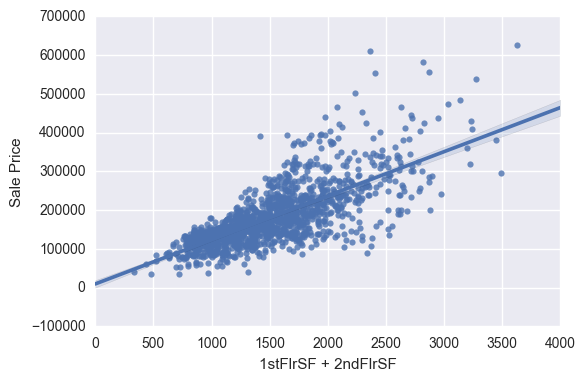

In [352]:
x, y = pd.Series((FlrSF), name="1stFlrSF + 2ndFlrSF"), pd.Series((y_db_train), name="Sale Price")
sns.regplot(x, y, data=df, order=1);

In [353]:
final_df['OverallFloorArea'] = final_df['1stFlrSF'] + final_df['2ndFlrSF']

Hence, we'll add the new feature _OverallFloorArea = 1stFlrSF + 2ndFlrSF_ to represent the overall floor area.

#### 2. All Living Area square feet 

Combine the below features to represent the hole living area:
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet

In [354]:
All_Living_Area = train['TotalBsmtSF'] + train['GrLivArea']

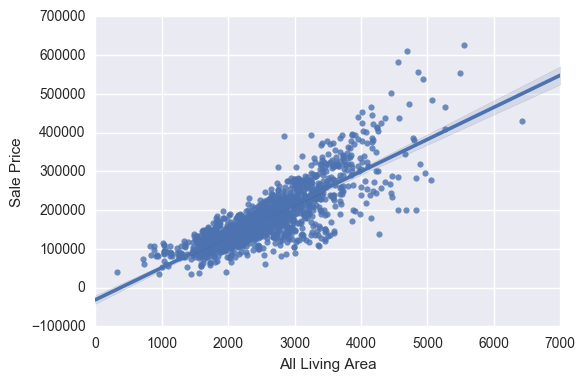

In [355]:
x, y = pd.Series((All_Living_Area), name="All Living Area"), pd.Series((y_db_train), name="Sale Price")
sns.regplot(x, y, data=df, order=1);

In [356]:
final_df['OverallLivingArea'] = final_df['TotalBsmtSF'] + final_df['GrLivArea']

Hence, we'll add the new feature _OverallLivingArea = TotalBsmtSF + GrLivArea_ to represent the overall living area.

#### 3. Overall Quality
Create a new feature that describe the overall house condition
* OverallQual: Rates the overall material and finish of the house
* OverallCond: Rates the overall condition of the house

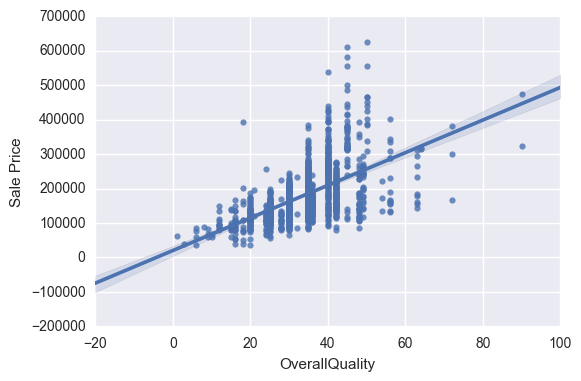

In [357]:
OverallQuality = train["OverallQual"] * train["OverallCond"]
x, y = pd.Series((OverallQuality), name="OverallQuality"), pd.Series((y_db_train), name="Sale Price")
sns.regplot(x, y, data=df, order=1);

In [358]:
final_df["OverallQuality"] = final_df["OverallQual"] * final_df["OverallCond"]

Hence, we'll add the new feature _OverallQuality = OverallQual + OverallCond_ to represent the overall house condition.

#### 4. Overall garage quality
Create a new feature that describe the overall garage of the house condition
* GarageQual: Garage quality
* GarageCond: Garage condition

In [361]:
final_df["OverallGarageQuality"] = final_df["GarageQual"] * final_df["GarageCond"]

The new feature _OverallGarageQuality = GarageQual * GarageCond_ represent the overall garage condition.



#### 5. Overall exterior quality
* ExterQual: Evaluates the quality of the material on the exterior 
* ExterCond: Evaluates the present condition of the material on the exterior

In [362]:
final_df["OverallExteriorQuality"] = final_df["ExterQual"] * final_df["ExterCond"]

The new feature _OverallExteriorQuality = ExterQual * ExterCond_ represent the overall quality of material on the exterior.

#### 7. Overall kitchen score

Create a new feature that describe the overall kitchen condition/score

Kitchen: Kitchens above grade
KitchenQual: Kitchen quality, which we mapped above as following

       9	Ex	Excellent
       7	Gd	Good
       5	TA	Typical/Average
       3	Fa	Fair
       2	Po	Poor

In [363]:
final_df['OverallKitchenScore'] = final_df["KitchenAbvGr"] * final_df["KitchenQual"]

The new feature _OverallKitchenScore_ represent the overall kitchen score.

#### 8. Overall fireplace score

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       9	Ex	Excellent - Exceptional Masonry Fireplace
       7	Gd	Good - Masonry Fireplace in main level
       5	TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       3	Fa	Fair - Prefabricated Fireplace in basement
       2	Po	Poor - Ben Franklin Stove
       0	NA	No Fireplace

In [364]:
final_df['OverallFireplaceScore'] = final_df["Fireplaces"] * final_df["FireplaceQu"]

The new feature _OverallFireplaceScore_ represent the overall fireplace score.

#### 9. Overall garage score

* GarageArea: Size of garage in square feet
* GarageQual: Garage quality

In [365]:
final_df["OverallGarageScore"] = final_df["GarageArea"] * final_df["GarageQual"]

The new feature _OverallGarageScore_ represent the overall garage score.

#### 10. Overall pool score
* PoolArea: Pool area in square feet
* PoolQC: Pool quality

In [366]:
final_df["OverallPoolScore"] = final_df["PoolArea"] * final_df["PoolQC"]

The new feature _OverallPoolScore_ represent the overall pool score.

#### 11. Total number of bathrooms

* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade

In [367]:
final_df["OverallBathroomsNumber"] = final_df["BsmtFullBath"] + (0.5 * final_df["BsmtHalfBath"]) + final_df["FullBath"] + (0.5 * final_df["HalfBath"])

The new feature _OverallBathroomsNumber = BsmtFullBath + (0.5 BsmtHalfBath) + FullBath + (0.5 * HalfBath)_ represent the overall number of bathrooms.

#### 12. Total square feet for porch
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet

In [368]:
final_df["OverallPorchSF"] = final_df["OpenPorchSF"] + final_df["EnclosedPorch"] + final_df["3SsnPorch"] + final_df["ScreenPorch"]

The new feature _OverallPorchSF_ represent the overall  SF for proch.

#### 13. House completed before sale or not
SaleCondition: Condition of sale

       0	Normal	Normal Sale
       0	Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       0	AdjLand	Adjoining Land Purchase
       0	Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       0	Family	Sale between family members
       1	Partial	Home was not completed when last assessed (associated with New Homes)

In [369]:
final_df["IsCompletedBeforeSale"] = final_df['SaleCondition'].replace({"Abnorml" : 1, "Alloca" : 1, "AdjLand" : 1, 
                                                      "Family" : 1, "Normal" : 1, "Partial" : 0})

The new feature _IsCompletedBeforeSale_ will rwpresent weather the house was completed before sale or not

#### 14. Dwelling features
       
Extracting new set of features:
* 14.1 Newer dwelling
* 14.2 Older dwelling
* 14.3 Duplex dwelling
* 14.4 SplitFoyer dwelling

In [370]:
final_df["OlderDwelling"] = final_df["MSSubClass"].replace({
                                            'SC20':  0, 
                                            'SC30':  1, 
                                            'SC40':  0, 
                                            'SC45':  0,
                                            'SC50':  0, 
                                            'SC60':  0,
                                            'SC70':  1,
                                            'SC75':  0,
                                            'SC80':  0,
                                            'SC85':  0,
                                            'SC90':  0,
                                            'SC120': 0,
                                            'SC150': 0,
                                            'SC160': 0,
                                            'SC180': 0,
                                            'SC190': 0})

In [371]:
final_df["NewerDwelling"] = final_df["MSSubClass"].replace({
                                            'SC20':  1, 
                                            'SC30':  0, 
                                            'SC40':  0, 
                                            'SC45':  0,
                                            'SC50':  0, 
                                            'SC60':  1,
                                            'SC70':  0,
                                            'SC75':  0,
                                            'SC80':  0,
                                            'SC85':  0,
                                            'SC90':  0,
                                            'SC120': 1,
                                            'SC150': 0,
                                            'SC160': 0,
                                            'SC180': 0,
                                            'SC190': 0})

In [372]:
final_df["DuplexDwelling"] = final_df["MSSubClass"].replace({
                                            'SC20':  0, 
                                            'SC30':  0, 
                                            'SC40':  0, 
                                            'SC45':  0,
                                            'SC50':  0, 
                                            'SC60':  0,
                                            'SC70':  0,
                                            'SC75':  0,
                                            'SC80':  0,
                                            'SC85':  0,
                                            'SC90':  1,
                                            'SC120': 0,
                                            'SC150': 0,
                                            'SC160': 0,
                                            'SC180': 0,
                                            'SC190': 0})

In [373]:
final_df["SplitFoyerDwelling"] = final_df["MSSubClass"].replace({
                                            'SC20':  0, 
                                            'SC30':  0, 
                                            'SC40':  0, 
                                            'SC45':  0,
                                            'SC50':  0, 
                                            'SC60':  0,
                                            'SC70':  0,
                                            'SC75':  0,
                                            'SC80':  1,
                                            'SC85':  1,
                                            'SC90':  0,
                                            'SC120': 0,
                                            'SC150': 0,
                                            'SC160': 0,
                                            'SC180': 1,
                                            'SC190': 0})

#### 14. Bad heating
Extract a new feature from HeatingQC to represent the exsitance of bad heating.

In [374]:
final_df["BadHeating"] = final_df['HeatingQC'].replace({9 : 0, 7 : 0, 5 : 0, 
                                                      2 : 1, 1 : 1})

#### 15. Seanon months

Extract a new feature to represent the most selling months.
From the below figure we could conclude that these monthes are May, Aug, Mar, Apr, Jul, Jun, therefore, a new feature will be added to capture this observation.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

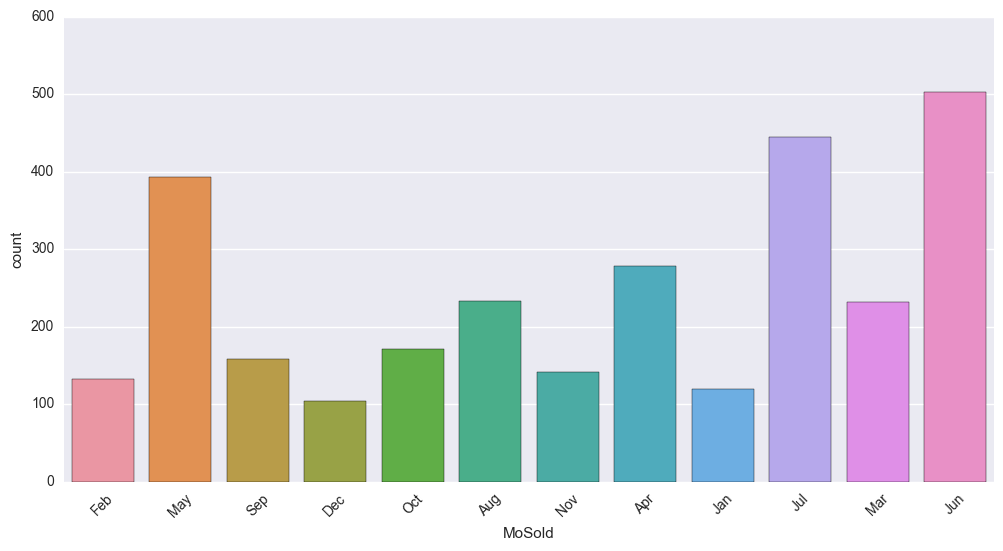

In [375]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'MoSold', data = final_df)
plt.xticks(rotation=45)

In [376]:
final_df["SeanonMonths"] = final_df['MoSold'].replace({"Feb": 0, "May": 1, "Sep": 0, "Dec": 0, "Oct" : 0, "Aug" : 1, 
                                                      "Nov": 0, "Apr" : 1, "Jan" : 0, "Jul" : 1, "Mar" : 1, "Jun" : 1})

In [377]:
#for m in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
#    ms = final_df[final_df['MoSold'] == m]
#    print m + str(len(ms))

In [378]:
final_df["MonthsSales"] = final_df['MoSold'].replace({"Feb": 1, "May": 4, "Sep": 1, "Dec": 1, "Oct" : 1, "Aug" : 2, 
                                                      "Nov": 1, "Apr" : 2, "Jan" : 1, "Jul" : 4, "Mar" : 2, "Jun" : 5})

#### 16. High selling Neighborhood
Extract new feature that represent high selling neighborhood, from the below figure we could conclude that CollgCr, OldTown, Somerst, NAmes, Edwards as a high selling neighborhood.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

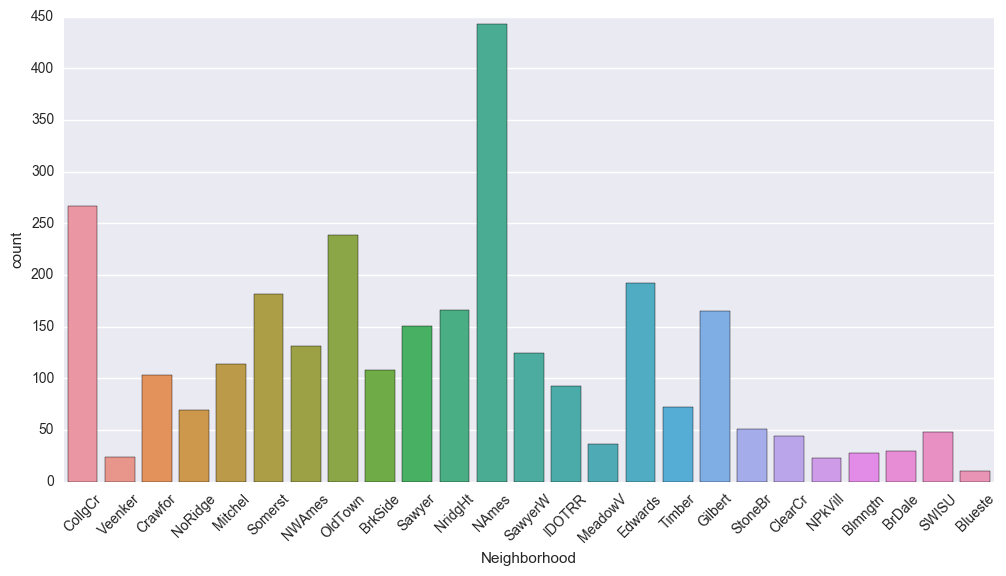

In [379]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = df)
plt.xticks(rotation=45)

In [380]:
final_df["HSNeighborhood"] = final_df["Neighborhood"].replace({
                                            'Blmngtn':  0, 
                                            'Blueste':  0, 
                                            'BrDale':  0, 
                                            'BrkSide':  0,
                                            'ClearCr':  0, 
                                            'CollgCr':  1,
                                            'Crawfor':  0,
                                            'Edwards':  1,
                                            'Gilbert':  0,
                                            'IDOTRR':  0,
                                            'MeadowV':  0,
                                            'Mitchel':  0,
                                            'NAmes':  1,
                                            'NoRidge':  0,
                                            'NPkVill':  0,
                                            'NridgHt':  0,
                                            'NWAmes':  0, 
                                            'OldTown':  1, 
                                            'SWISU':  0, 
                                            'Sawyer':  0,
                                            'SawyerW':  0, 
                                            'Somerst':  1,
                                            'StoneBr':  0,
                                            'Timber':  0,
                                            'Veenker':  0})

In [381]:
# Work on the train data only from here

In [382]:
X_db_train = final_df[:train.shape[0]]

In [383]:
X_db_train_all = pd.concat([X_db_train, y_db_train], axis=1)

#### 17. Feature Polynomials

Find most correclated features relative to sale price and create Polynomials features for the top selected features.

In [384]:
corr = X_db_train_all.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corrSalePrice = corr.SalePrice
print(corrSalePrice)

SalePrice                 1.000000
OverallLivingArea         0.821091
OverallQual               0.800858
OverallFloorArea          0.729888
GrLivArea                 0.720516
ExterQual                 0.694628
SimplOverallQual          0.676212
KitchenQual               0.666217
SimplExterQual            0.665930
GarageCars                0.649256
TotalBsmtSF               0.646584
SimplKitchenQual          0.637147
GarageArea                0.636964
OverallGarageScore        0.636447
OverallBathroomsNumber    0.635939
1stFlrSF                  0.625235
SimplBsmtQual             0.619615
BsmtQual                  0.611891
OverallExteriorQuality    0.583217
OverallQuality            0.566514
FullBath                  0.559048
GarageFinish              0.541968
TotRmsAbvGrd              0.537462
YearBuilt                 0.535279
FireplaceQu               0.530435
YearRemodAdd              0.521428
GarageYrBlt               0.520632
OverallFireplaceScore     0.511712
SimplFireplaceQu    

In [385]:
#for i in range(1, 12):
#    feat = corrSalePrice.index[i]
#    feat_name_s2 = feat + "S2"
#    
#    final_df[feat_name_s2] = final_df[feat] ** 2
#    feat_name_s3 = feat + "S3"
#    final_df[feat_name_s3] = final_df[feat] ** 3
#    feat_name_sq = feat + "Sq"
#    final_df[feat_name_sq] = np.sqrt(final_df[feat])

In [386]:
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OverallPorchSF,IsCompletedBeforeSale,OlderDwelling,NewerDwelling,DuplexDwelling,SplitFoyerDwelling,BadHeating,SeanonMonths,MonthsSales,HSNeighborhood
0,SC60,RL,65.0,8450,2,0,4,4,4,Inside,...,61,1,0,1,0,0,0,0,1,1
1,SC20,RL,80.0,9600,2,0,4,4,4,FR2,...,0,1,0,1,0,0,0,1,4,0
2,SC60,RL,68.0,11250,2,0,3,4,4,Inside,...,42,1,0,1,0,0,0,0,1,1
3,SC70,RL,60.0,9550,2,0,3,4,4,Corner,...,307,1,1,0,0,0,0,0,1,0
4,SC60,RL,84.0,14260,2,0,3,4,4,FR2,...,84,1,0,1,0,0,0,0,1,0


In [387]:
categorical_features = final_df.select_dtypes(include = ["object"]).columns
numerical_features = final_df.select_dtypes(exclude = ["object"]).columns

In [388]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 95
Categorical features : 19


In [389]:
numerical_df = final_df[numerical_features]
categorical_df = final_df[categorical_features]

In [390]:
#print("NAs for numerical features : " + str(numerical_df.isnull().values.sum()))

### Feature Standardization for numerical features

With features being on different scales, certain weights may update faster than others since the feature values play a role in the weight updates.

It is also a general requirement for many machine learning algorithms like SVMs, logistic regression, PCA which will be using to train our model.

http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

#### Identify and transform Skewed numerical features

Log transform of the skewed numerical features to lessen impact of outliers and to normalize the dataset. Skewness with |value| > 0.5 is considered at least moderately skewed.

> skewed_feature = log(skewed_feature + 1)

https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

In [391]:
from scipy.stats import skew

skewness = numerical_df.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index

final_df[skewed_features] = np.log1p(final_df[skewed_features])

74 skewed numerical features to log transform


In [392]:
y_db_train = np.log1p(train['SalePrice']) 

### One-Hot-Encoding

Perform One-Hot-Encoding for the rest of categorical features to transfor to one larger vector with only 0 and 1 to determine the absense or existance of specific feature.

In [393]:
final_df = pd.get_dummies(final_df)

### Summary of the datase features

* Encoded categorical features that has some order information
* Added 20 new features
* Applay one-hot-encoding to the rest of categorical features

Below are a sample of the new dataset features

In [394]:
final_df.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,BldgType,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,1.098612,0.0,1.609438,1.609438,1.609438,1.386294,1.791759,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.394449,9.169623,1.098612,0.0,1.609438,1.609438,1.609438,1.386294,1.791759,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.234107,9.328212,1.098612,0.0,1.386294,1.609438,1.609438,1.386294,1.791759,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.110874,9.164401,1.098612,0.0,1.386294,1.609438,1.609438,1.386294,1.791759,7,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.442651,9.565284,1.098612,0.0,1.386294,1.609438,1.609438,1.386294,1.791759,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Training, test sets

In [395]:
X_db_train = final_df[:train.shape[0]] #y_train from above

X_db_test = final_df[train.shape[0]:]

X_train, X_test, y_train, y_test = train_test_split(X_db_train, y_db_train, test_size=0.3, random_state=0)

In [396]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))

print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

print("New number of features : " + str(X_db_train.shape[1]))

X_train : (1019, 273)
X_test : (437, 273)
y_train : (1019,)
y_test : (437,)
New number of features : 273


### Implementation

#### Feature selection

The aim of this part is to try to helight the features that have the highest impact on the sale price

https://www.kaggle.com/juliencs/house-prices-advanced-regression-techniques/a-study-on-regression-applied-to-the-ames-dataset/

#### Lasso and Ridge Regression

First Linear Regression as a start point to be able to determine the impact of applying Lass and Ridge regression, in addition Lasso regression will highlight the most important features based on the correlation.

##### 1. Linear Regression

In [397]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression

In [398]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print "RMSE on Training set :", rmse_cv_train(lr).mean()
print "RMSE on Test set :", rmse_cv_test(lr).mean()

RMSE on Training set : 0.150033598343
RMSE on Test set : 0.297361191992


The Root-mean-square (RMSE) error on the training set is high and higher on testing set which is a sign for overfit problem, therefore, next we will applay regularixation to solve the overfitting problem as well as highlight the most important feature.

#### 2. Linear Regression with regularization

Regularization is a very useful method to handle:
* Collinearity
* Filter out noise from data
* Prevent overfitting
The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

> Python Machine Learning Book by Sebastian Raschka

##### 2.1 Linear Regression with Ridge regularization  (L2 penalty)

L2 regularization adds penalty equivalent to square of the magnitude of coefficients.
==> LS Obj + α * (sum of square of coefficients)

Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

###### 2.1.1 Choosing Alpha
Alpha is the bias term that will be used to penalize the extreme coefficient:
* if Alpha is zero: we will end up with simple linear regression, in other words, we’ll get the same coefficients as simple linear regression.
* if Aplha is infinity: the model will not be able to capture anything as The coefficients will be zero
* therefore, our goal is choose the best Alpha between zero and infinity.

Starting with very small to large Aplha values and by applying cross validation we will be able to determine the best Alpha that we should use to train our model.

l2_penalty_values = [0.05, 0.1, 0.3, 1, 3, 5, 6, 7, 8, 9, 10, 15, 30, 50, 75]

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

In [399]:
l2_penalty_values = [0.05, 0.1, 0.3, 1, 3, 5, 6, 7, 8, 9, 10, 15, 30, 50, 75]
ridge = RidgeCV(alphas = l2_penalty_values, cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

l2_penalty_values = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                     alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                     alpha * 1.35, alpha * 1.4]
ridge = RidgeCV(alphas = l2_penalty_values, cv = 10)
ridge.fit(X_train, y_train)

alpha = ridge.alpha_
print "Best alpha for Ridge regression is:", alpha

Best alpha for Ridge regression is: 8


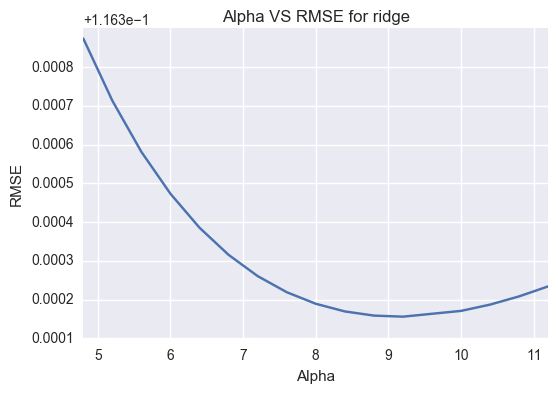

In [400]:
cv_ridge = [rmse_cv_train(Ridge(alpha = alpha)).mean() for alpha in l2_penalty_values]

cv_ridge = pd.Series(cv_ridge, index = l2_penalty_values)
cv_ridge.plot(title = "Alpha VS RMSE for ridge")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

> Figure: RMSE vs Alpha

When alpha is large the regularization is strong and the model cannot capture all the complexities in the data, however, when alpha is small (flexible) the model begins to overfit. 

A value of alpha = 8 is the right choice based on the above figure.

###### 2.1.2 Train and report RMSE

In [401]:
print "Ridge RMSE on Training set :", rmse_cv_train(ridge).mean()
print "Ridge RMSE on Test set :", rmse_cv_test(ridge).mean()

Ridge RMSE on Training set : 0.116396272233
Ridge RMSE on Test set : 0.121408532411


With Ridge regression our RMSE error has improved a lot, The difference between training and test results indicate that we eliminated most of the overfitting.

###### 2.1.2 Best and Worest Coefficients 

Ridge picked 267 features 
and eliminated 6 features


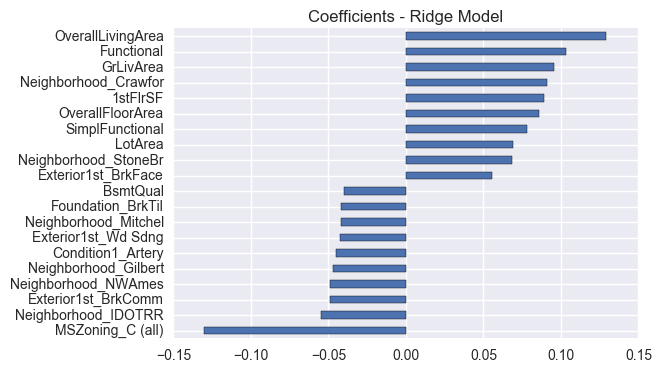

In [102]:
# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print "Ridge picked " + str(sum(coefs != 0)) + " features "
print "and eliminated " + str(sum(coefs == 0)) + " features"

imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients - Ridge Model")
plt.show()

> Figure: Coefficients in Ridge Model

Ridge used almost all of the existing features. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.

##### 2.2 Linear Regression with Lasso regularization  (L1 penalty)

Least Absolute Shrinkage and Selection Operator (Lasso) It is an alternative regularization method, by replacing the square of the weights by the sum of the absolute value of the weights.

Lasso adds penalty equivalent to absolute value of the magnitude of coefficients, Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

L1 regularization yields sparse feature vectors as most feature weights will be helpful for features selection.

###### 2.2.1 Choosing Alpha
Same as ridge regression, however, here we try smaller range of 
l1_penalty_values = [0.0001, 0.0003, 0.0004, 0.0005, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

In [103]:
# 3* Lasso
l1_penalty_values = [0.0001, 0.0003, 0.0004, 0.0005, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
lasso = LassoCV(alphas = l1_penalty_values)
lasso.fit(X_train, y_train)

alpha = lasso.alpha_

l1_penalty_values = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                     alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                     alpha * 1.35, alpha * 1.4]

lasso = LassoCV(alphas = l1_penalty_values, max_iter = 5000, cv = 5)

lasso.fit(X_train, y_train)
alpha = lasso.alpha_

print "Best alpha for Lasso id:", alpha 

('Best alpha :', 0.00045999999999999996)


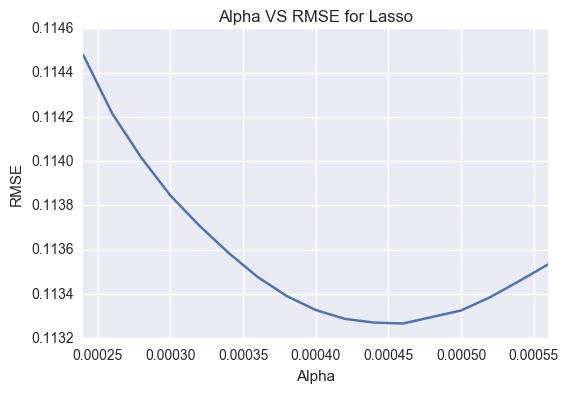

In [104]:
cv_ridge = [rmse_cv_train(Lasso(alpha = alpha)).mean() for alpha in l1_penalty_values]

cv_ridge = pd.Series(cv_ridge, index = l1_penalty_values)
cv_ridge.plot(title = "Alpha VS RMSE for Lasso")
plt.xlabel("Alpha")
plt.ylabel("RMSE")

###### 2.2.2 Train and report RMSE

In [105]:
print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

('Lasso RMSE on Training set :', 0.11350695539842474)
('Lasso RMSE on Test set :', 0.11600723086643834)


###### 2.2.2 Best and Worest Coefficients 

Lasso picked 108 features and eliminated the other 165 features


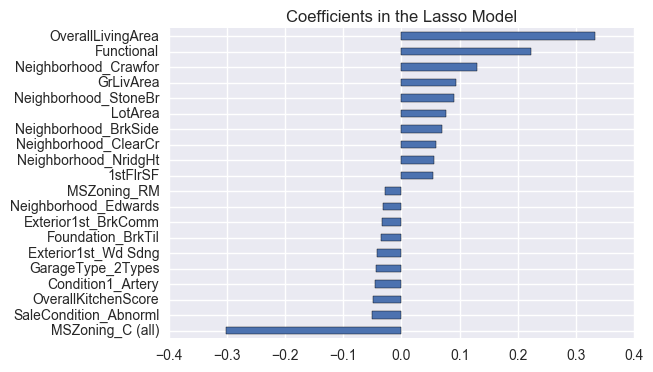

In [106]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

The Lasso model allow us to select 112 features and ignored 176 features. As we could see along with shrinking coefficients, lasso performs feature selection as well, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

In [232]:
#y_pred_lasso = lasso.predict(X_train)
#plt.figure(figsize=(10, 5))
#plt.scatter(y_train, y_pred_lasso, s=20)
#plt.title('Lasso model')
#plt.xlabel('Actual Sale Price')
#plt.ylabel('Predicted Sale Price')
#
#plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
#plt.tight_layout()

#### Univariate Selection
It's a statistical tests can be used to select those features that have the strongest relationship with the output variable.
http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

##### 3.1 SelectKBest
Select features according to the k highest scores.
We will be using f_regression from scikit-learn: It's a linear model for testing the effect of a single regressor, sequentially for many regressors.

This is done in 2 steps:
* 1- The cross correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
* 2- It is converted to an F score then to a p-value.

complexity of this algorithm is O(n_classes * n_features).

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

In [110]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_extraction.text  import CountVectorizer

vectorizer = CountVectorizer(lowercase=False)

kbest_X_labels = vectorizer.fit_transform(X_train)

kbest = SelectKBest(score_func=f_regression, k= 25)

kbest_X_new = kbest.fit_transform(X_train, y_train)

In [112]:
kbest_X_new_names = np.asarray(vectorizer.get_feature_names())[kbest.get_support()]

In [117]:
print list(kbest_X_new_names)

[u'BsmtCond', u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtFullBath', u'Condition1_RRNe', u'Condition2_Feedr', u'Condition2_PosN', u'DuplexDwelling', u'Electrical_Mix', u'Electrical_SBrkr', u'EnclosedPorch', u'ExterCond', u'ExterQual', u'Exterior1st_VinylSd', u'Exterior2nd_CBlock', u'Exterior2nd_Other', u'Exterior2nd_Stone', u'Exterior2nd_Stucco', u'Exterior2nd_VinylSd', u'Exterior2nd_Wd', u'FireplaceQu', u'Foundation_BrkTil', u'Foundation_CBlock', u'Foundation_Slab', u'PoolQC']


Above is the list of features that SelectKBest method returns.

#### 3.2 SelectPercentile

Select features according to a percentile of the highest scores

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [118]:
from sklearn.feature_selection import SelectPercentile, f_classif

vectorizer = CountVectorizer(lowercase=False)

per_X_labels = vectorizer.fit_transform(X_train)

per = SelectPercentile(score_func=f_classif, percentile= 10)

per_X_new = per.fit_transform(X_train, y_train)

In [119]:
per_X_new_names = np.asarray(vectorizer.get_feature_names())[per.get_support()]

In [120]:
print list(per_X_new_names)

array([u'3SsnPorch', u'BsmtCond', u'BsmtFullBath', u'Condition2_Feedr',
       u'DuplexDwelling', u'ExterCond', u'Exterior1st_VinylSd',
       u'Exterior2nd_Stone', u'Exterior2nd_Stucco', u'Exterior2nd_VinylSd',
       u'Foundation_CBlock', u'Foundation_Slab', u'Foundation_Wood',
       u'MSSubClass_SC190', u'MSSubClass_SC20', u'MSZoning_RM',
       u'MiscFeature_Shed', u'MiscVal', u'MoSold_Jan',
       u'Neighborhood_NridgHt', u'OverallGarageScore', u'RoofMatl_Roll',
       u'SaleType_Con', u'SimplFunctional', u'SimplGarageCond',
       u'SimplOverallCond', u'TotRmsAbvGrd', u'WoodDeckSF'], 
      dtype='<U22')

Above is the list of features that SelectPercentile method returns.

In [125]:
per_X_new_names = set(per_X_new_names) 
kbest_X_new_names = set(kbest_X_new_names)

new_fet = list(set(per_X_new_names) | set(kbest_X_new_names))  
print list(new_fet)
print "Total number of combined features is: ", len(new_fet)

[u'3SsnPorch', u'FireplaceQu', u'BsmtFullBath', u'Foundation_CBlock', u'RoofMatl_Roll', u'MSZoning_RM', u'MiscFeature_Shed', u'SaleType_Con', u'WoodDeckSF', u'SimplOverallCond', u'BsmtCond', u'EnclosedPorch', u'MiscVal', u'Exterior2nd_Stucco', u'OverallGarageScore', u'Exterior2nd_Stone', u'TotRmsAbvGrd', u'Condition1_RRNe', u'Exterior2nd_Other', u'Condition2_PosN', u'Foundation_Wood', u'SimplFunctional', u'Electrical_SBrkr', u'Condition2_Feedr', u'Foundation_BrkTil', u'Exterior1st_VinylSd', u'BsmtFinSF1', u'BsmtFinSF2', u'Exterior2nd_CBlock', u'DuplexDwelling', u'Foundation_Slab', u'Electrical_Mix', u'Exterior2nd_VinylSd', u'MoSold_Jan', u'ExterCond', u'ExterQual', u'MSSubClass_SC20', u'MSSubClass_SC190', u'PoolQC', u'SimplGarageCond', u'Exterior2nd_Wd', u'Neighborhood_NridgHt']
Total number of combined features is:  42


Above is the list of features that SelectPercentile method returns combined with SelectKBest.

### Feature transformation

### Principal Component Analysis (PCA)

Is a method for feature selection that transform a set of correlated features into underlying set of orthogonal variables, PCA finds new coordinate system that's obtained by transformation and rotation only and moves the center of the data by moving the x-axis into the principal axis of variation and the y-axis into the orthogonal axis. PCA try to come up with a direction in the data to project our data to it while loosing the minimum amount of information.

The principal component is an unsupervised algorithm that try to make a composite feature (latent features) that probes the underlying phenomenon, which will help aginst dimensionality reduction.

Simply traing a PCA model to find the best compnent analysis returned and compine them with the above techninque as the best set of features.

From sklearn library we will use GridSearchCV to select the best parameters from PCA, the parameter that we will search through are number of component and svd_solver

In [129]:
from sklearn import decomposition, linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [151]:
pca = decomposition.PCA()

pipe = Pipeline(steps=[('pca', pca), ('logistic', lasso)])

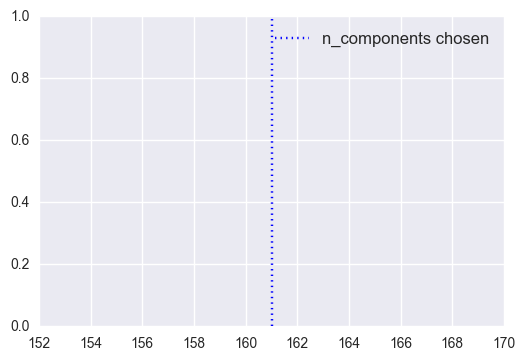

In [154]:
n_components = [x for x in range(1, 270, 5)]

#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, pca__svd_solver=['auto', 'full', 'arpack']))
estimator.fit(X_train, y_train)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

> Figure: PCA 

From the above figure we could see that PCA created 160 transformed features that could be used.

In [155]:
#estimator.best_estimator_.named_steps['pca'].n_components
#estimator.best_estimator_.named_steps['pca'].explained_variance_

In [158]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [175]:
#pca = PCA(n_components=2)
#kbest = SelectKBest(k=1)

#### Training

##### Random Forest Regressor

A random forest fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [171]:
rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [173]:
print "Random Forest Regressor RMSE on Training set :", rmse_cv_train(rfr).mean()
print "Random Forest Regressor RMSE on Test set :", rmse_cv_test(rfr).mean()

Random Forest Regressor RMSE on Training set : 0.140613028916
Random Forest Regressor RMSE on Test set : 0.137831765785


#### Tune Random Forest Hyper-parameters by using Gridsearch
Hyper-parameters are parameters that are not directly learnt within estimators they are passed as arguments to the constructor of the estimator classes.

In [160]:
param_grid = dict(max_features= [50, 100, 150],
                  min_samples_leaf= [1, 3, 10],
                  n_estimators = [500, 700, 1000],
                  min_samples_split = [2, 6, 10])

rfr_grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring=scorer, n_jobs=-1)
rfr_grid_search.fit(X_train, y_train)

print(rfr_grid_search.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=50, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


The best parameters that we reached for RandomForestRegressor are:

In [166]:
rfr_grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 50,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 700,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
rfr_best = rfr_grid_search.best_estimator_
rfr_rmse_train = rmse_cv_train(rfr_best, cv = 10)
rfr_rmse_test = rmse_cv_test(rfr_best, cv = 10)

print "Tuned Random Forest Regressor RMSE on Training set :", rfr_rmse_train.mean()
print "Tuned Random Forest Regressor RMSE on Test set :", rfr_rmse_test.mean()

Tuned Random Forest Regressor RMSE on Training set : 0.131269766413
Tuned Random Forest Regressor RMSE on Test set : 0.130984158588


The RMSE for the tuned Random Forest Regressor is better than the untuned Random Forest Regressor, however, we got better scores with Lasso and Ridge regression.

#### Combine Tune Random Forest with Lasso features

In [216]:
lass_features = coefs[coefs.values > 0]


rfr_lasso = rfr_best.fit(X_train[lass_features.index], y_train)
rfr_lasso_rmse_train = rmse_cv_train(rfr_lasso, cv = 10)
rfr_lasso_rmse_test = rmse_cv_test(rfr_lasso, cv = 10)

print "Tuned Random Forest Regressor with Lasso features RMSE on Training set :", rfr_lasso_rmse_train.mean()
print "Tuned Random Forest Regressor with Lasso features RMSE on Test set :", rfr_lasso_rmse_test.mean()

Tuned Random Forest Regressor with Lasso features RMSE on Training set : 0.131325177679
Tuned Random Forest Regressor with Lasso features RMSE on Test set : 0.130886344633


The RMSE for the tuned Random Forest Regressor with features from lasso are very similar.

#### Combine Tune Random Forest with PCA features

In [191]:
combined_features = FeatureUnion([("pca", pca)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
rfr_pca_pipeline = Pipeline([("features", combined_features), ("rfr", rfr_best)])
rfr_pca_pipeline.fit(X_features, y_train)

print "Tuned, Combine (PCA) Random Forest Regressor RMSE on Training set :", rmse_cv_train(rfr_pca_pipeline, cv = 10).mean()
print "Tuned, Combine (PCA) Random Forest Regressor RMSE on Test set :", rmse_cv_test(rfr_pca_pipeline, cv = 10).mean()

Tuned, Combine (PCA) Random Forest Regressor RMSE on Training set : 0.207585810796
Tuned, Combine (PCA) Random Forest Regressor RMSE on Test set : 0.233587678663


The RMSE for the tuned Random Forest Regressor with features from PCA is higher than the rest of all models.

#### Combin Tune Random Forest with combined features from PCA and SelectKBest

In [192]:
combined_features = FeatureUnion([("pca", pca), ("kbest", kbest)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
pipeline = Pipeline([("features", combined_features), ("rfr", rfr_best)])
pipeline.fit(X_features, y_train)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kbest', SelectKBest(k=25, score_func=<function f_regression at 0x114d45578>))],
       transformer_w...imators=700, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [193]:
rfr_com = pipeline
rfr_com_rmse_train = rmse_cv_train(rfr_com, cv = 10)
rfr_com_rmse_test = rmse_cv_test(rfr_com, cv = 10)

print "Tuned, Combine Random Forest Regressor RMSE on Training set :", rfr_com_rmse_train.mean()
print "Tuned, Combine Random Forest Regressor RMSE on Test set :", rfr_com_rmse_test.mean()

Tuned, Combine Random Forest Regressor RMSE on Training set : 0.144987114561
Tuned, Combine Random Forest Regressor RMSE on Test set : 0.147744570882


The RMSE for the tuned Random Forest Regressor with features from PCA and Kbest is better than features from PCA alone, however, it's still higher that the tuned parameter alone.

#### Tune Random Forest and cobine features from SelectPercentile and SelectKBest

In [195]:
combined_features = FeatureUnion([("per", per), ("kbest", kbest), ("pca", pca)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
rfr_per_kbest_pipeline = Pipeline([("features", combined_features), ("rfr", rfr_best)])
rfr_per_kbest_pipeline.fit(X_features, y_train)

print "Tuned, Combine (Kbest, Percentile) Random Forest Regressor RMSE on Training set :", rmse_cv_train(rfr_per_kbest_pipeline, cv = 10).mean()
print "Tuned, Combine (Kbest, Percentile) Random Forest Regressor RMSE on Test set :", rmse_cv_test(rfr_per_kbest_pipeline, cv = 10).mean()

Tuned, Combine (Kbest, Percentile) Random Forest Regressor RMSE on Training set : 0.145523129516
Tuned, Combine (Kbest, Percentile) Random Forest Regressor RMSE on Test set : 0.144164712044


The RMSE for the tuned Random Forest Regressor with features from SelectPercentile and SelectKBest is better than features from PCA alone and PCA with SelectKBest, however, it's still higher that the tuned parameter alone.

#### Visualization summary of best random forest model

As a conclusion the tuned random forest model produced the better results, however, in general Regularized regression model yeild better scores.

Below are a visualization summary for random forest model.

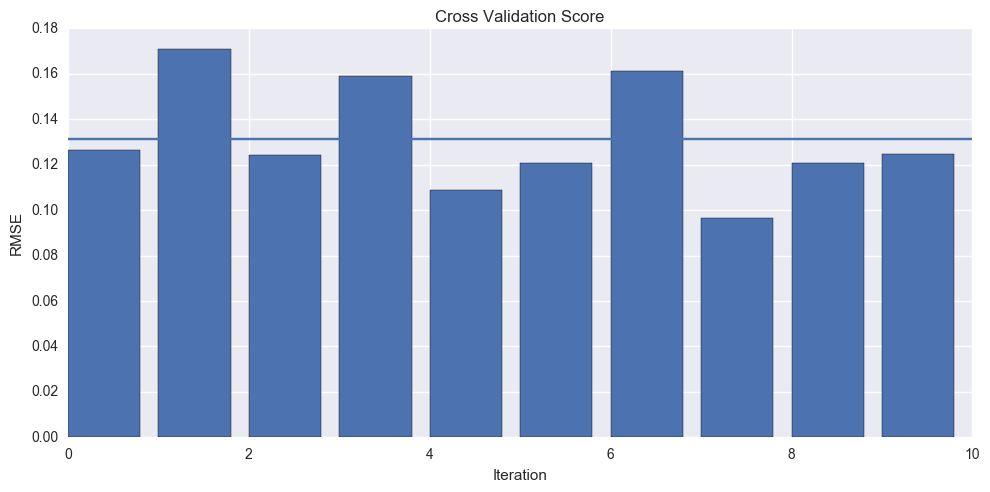

In [167]:
plt.figure(figsize=(10,5))
plt.bar(range(len(rfr_rmse_train)), rfr_rmse_train)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')
plt.plot(range(len(rfr_rmse_train) + 1), [rfr_rmse_train.mean()] * (len(rfr_rmse_train) + 1))
plt.tight_layout()

> Figure: the cross validation errors summary for RandomForestRegressor.

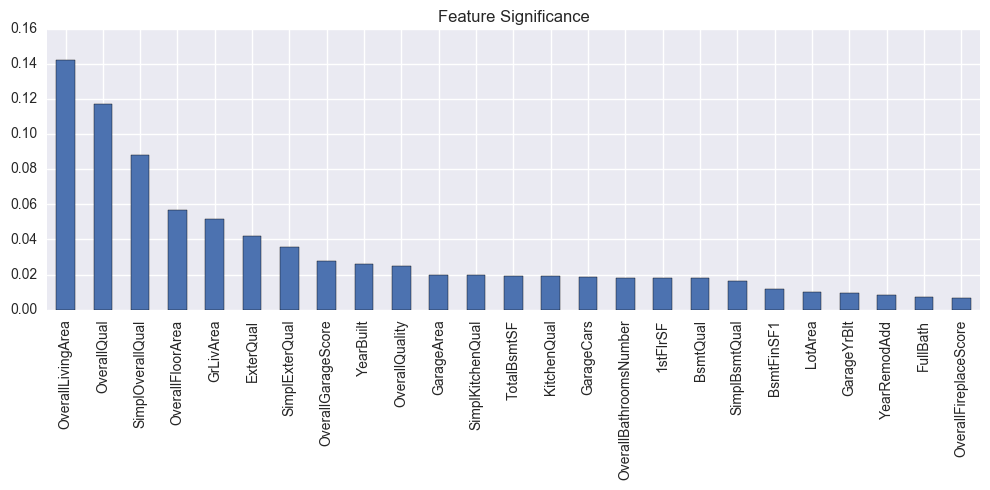

In [168]:
# Fit model with training data
rfr_best.fit(X_train, y_train)

# Output feature importance coefficients, map them to their feature name, and sort values
coef = pd.Series(rfr_best.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
coef.head(25).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

> Figure: RandomForestRegressor feature importance.

The above figure order the features with their importance.

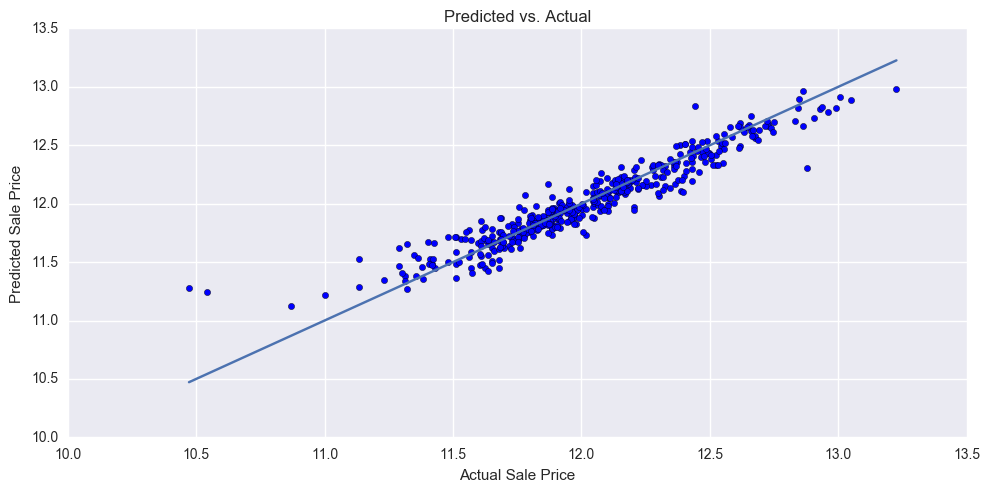

In [169]:
y_pred = rfr_best.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

> Figure RandomForestRegressor prediction line.

The above figure show that RandomForestRegressor was able to capture most of the sale proce pattern.

#### Best Model

As lass model is the model that reported the lowest RMSE score for both training and testing sets, we will try to use the same model and features from SelectKBest, SelectPercintile and PCA.

In [190]:
combined_features = FeatureUnion([("per", per), ("kbest", kbest)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
rfr_per_kbest_pipeline = Pipeline([("features", combined_features), ("lasso", lasso)])
rfr_per_kbest_pipeline.fit(X_features, y_train)

print "Combine (Kbest, Percentile) with lasso RMSE on Training set :", rmse_cv_train(rfr_per_kbest_pipeline, cv = 10).mean()
print "Combine (Kbest, Percentile) with lasso RMSE on Test set :", rmse_cv_test(rfr_per_kbest_pipeline, cv = 10).mean()

combined_features = FeatureUnion([("kbest", kbest)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
rfr_per_kbest_pipeline = Pipeline([("features", combined_features), ("lasso", lasso)])
rfr_per_kbest_pipeline.fit(X_features, y_train)

print "Combine (Kbest) with lasso RMSE on Training set :", rmse_cv_train(rfr_per_kbest_pipeline, cv = 10).mean()
print "Combine (Kbest) with lasso RMSE on Test set :", rmse_cv_test(rfr_per_kbest_pipeline, cv = 10).mean()

combined_features = FeatureUnion([("per", per)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
rfr_per_kbest_pipeline = Pipeline([("features", combined_features), ("lasso", lasso)])
rfr_per_kbest_pipeline.fit(X_features, y_train)

print "Combine (Percentile) with lasso RMSE on Training set :", rmse_cv_train(rfr_per_kbest_pipeline, cv = 10).mean()
print "Combine (Percentile) with lasso RMSE on Test set :", rmse_cv_test(rfr_per_kbest_pipeline, cv = 10).mean()

combined_features = FeatureUnion([("pca", pca)])
X_features = combined_features.fit(X_train, y_train).transform(X_train)
rfr_per_kbest_pipeline = Pipeline([("features", combined_features), ("lasso", lasso)])
rfr_per_kbest_pipeline.fit(X_features, y_train)

print "Combine (PCA) with lasso RMSE on Training set :", rmse_cv_train(rfr_per_kbest_pipeline, cv = 10).mean()
print "Combine (PCA) with lasso RMSE on Test set :", rmse_cv_test(rfr_per_kbest_pipeline, cv = 10).mean()

Combine (Kbest, Percentile) with lasso RMSE on Training set : 0.137002205605
Combine (Kbest, Percentile) with lasso RMSE on Test set : 0.128995129598
Combine (Kbest) with lasso RMSE on Training set : 0.140483763831
Combine (Kbest) with lasso RMSE on Test set : 0.133560380862
Combine (Percentile) with lasso RMSE on Training set : 0.156094254311
Combine (Percentile) with lasso RMSE on Test set : 0.149342309673
Combine (PCA) with lasso RMSE on Training set : 0.116792311047
Combine (PCA) with lasso RMSE on Test set : 0.123500844157


### Refinement

#### Regression Models
Applied linear regression then used regularized our linear model using Ridge and Lasso regression to deal with overfit problem that we got from linear regression and highligted the the most revant features.

#### Feature selection/transformation Models
Used SelectPercentile and SelectKBest for feature selection and PCA for feature transformation.

#### Random Forest Models
Used a random forest regressor algorithm without any tuning, then tune it's hyper-paratemter.
Train random forest regressor, with features from PCA, with features from PCA and SelectKBest and finally with features from SelectKBest and SelectPercentile

## IV. Results

From the above we could conclude that regularized regression with lasso reported the lowest RMSE error. The best Alpha value is 0.00045 which we reached after trying different Alpha values by using cross validation over 10 folds.

The reported RMSE for training data is 0.1135 and the reported RMSE for testing data is 0.1160, as we could see that the scores are very close to each other which means that our model was able to generalize very well to new or unseen data.

We also tried Lasso model with the features yeild from the feature selection and transformation models, we have combine SelectKBest features, SelectPercientile features and PCA transformed features. However, all of them reported a little higher RMSE which mean that selecting the best features really has an impact on the learning model.

Changing the parameters for Lasso model yeild different results, however, in general the variation between the results is very small 0.233 to 0.116 which an indication that the result from the model could be trusted.

### Justification

Now we will combare our best model (regularized regression with lasso) to the benchmark model.
Least Absolute Shrinkage and Selection Operator (Lasso) It is an alternative regularization method, by replacing the square of the weights by the sum of the absolute value of the weights.
Lasso adds penalty equivalent to absolute value of the magnitude of coefficients, Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
L1 regularization yields sparse feature vectors as most feature weights will be helpful for features selection.

As stated above our bench mark model yeild RMSE of 0.245 on training dataset 0.247 on testing dataset. On the other hand, our best model yeild 0.113 on training set and 0.116 which clearly shows that our model performs better than the benchmark model.

With error rate 10% our model is significant enough to have solved the problem.

## V. Conclusion

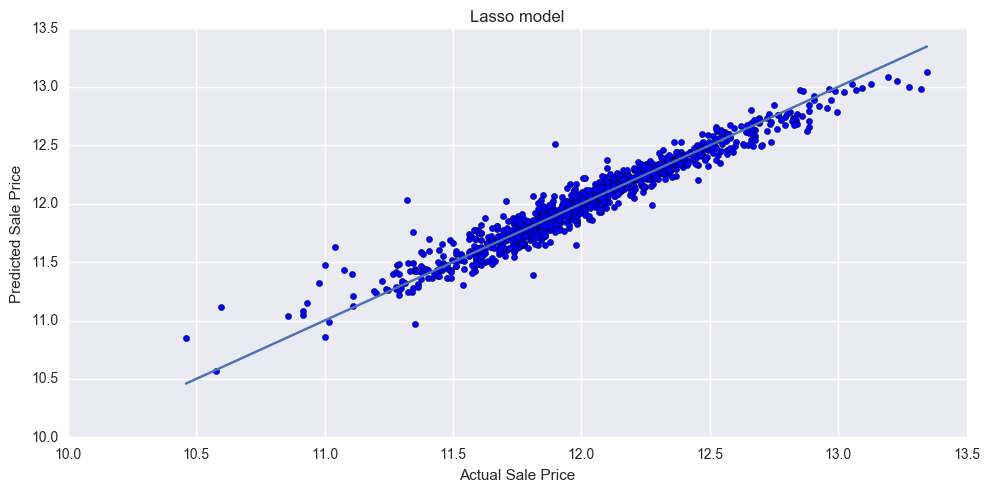

In [231]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_pred_lasso, s=20)
plt.title('Lasso model')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

> Figure: Lasso prediction

The above figure shows the how lass was able to capture most of sale price, by comparing the actual sale price and the predicted sale price the prediction line shows how the predicted and actual sale proce are highly correlated.

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_


** Summarization of the entire process **

Data Exploration
* Understand the data
* Features distribution and describtion
* House prices distribution

Exploratory Visualization
* Numerical features correlation
* Categorical Features relevance

Benchmark
* A linear regression model that predict the price based on some of the traditional parameters like square_feed, num_of_rooms, neighbour.

Data Preprocessing
* Spot outliers
* Handel Null data
* Encoding categorical feature
* Feature Engineering
* Feature Standardization for numerical features

Implementation
* Lasso and Ridge Regression
* Feature selection:
  * Univariate Selection SelectKBest, SelectPercentile
* Feature transformation 
  * PCA
* Random Forest Regressor
* Tune Hyper-parameters by using Gridsearch
* Combine features selected and transformed features with Lasso and Random Forest models
* Sated the results for each model and reported the Best Model

** Interesting aspects **
It was very interesting for me that a linear regression regularization model could performs better than a bosted random forest regressor model, as a result, there are no good or bad models however, each model may performes bettero or worest than other models with respect to the dataset or the problem that we are trying to solve.

** Difficult aspects **
The most difficult aspect was data preprosessing as the dataset containes many features some numerical, some categorical and some are categorical that has some order, and each type need different approcach to make the dataset readh for machine learning algorithms. Another observation is how by just make the skwed data more normal has significant improvment over the model results.

The final solution meets my expectations and i think the process taking could be applied to different datasets that try to predict any continues variable like sale price.

### Improvement
As an improvment i believe that we need to work more on the features selection part as there many features that has less impact, also emphasize more the important features, for example, the neighbourhood has a great impact on the sale price if we could do some reasearch on the Ames city and create a features that point out or order the most important neighborhood.

I would also consider using xgboost algorithm that i researched and compare its results.

I believe if my solution could be as a benchmark it will be very hard to find better solution, however, it's a chalange and that i wish i could overcome or see other that reported a better solution as learn from.

In [402]:
X_db_test_Id = pd.concat([test['Id'], X_db_test], axis=1)

In [403]:
print("NAs for numerical features : " + str(X_db_test_Id.isnull().values.sum()))

NAs for numerical features : 0


In [408]:
y_pred_lasso = lasso.predict(X_db_test)
y_pred = np.exp(y_pred_lasso)

In [409]:
pred_df = pd.DataFrame(y_pred, index=X_db_test_Id["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')